## Business case: To predict number of confirmed cases.

In [125]:
## Importing the libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [126]:
## loading the data
data=pd.read_csv('time_series_covid19_confirmed_global.csv')
death=pd.read_csv('time_series_covid19_deaths_global.csv')
recover=pd.read_csv('time_series_covid19_recovered_global.csv')

In [127]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154


## Basic Checks

In [128]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [129]:
data.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,29906,30574,31362,32250,33006,33843,34401,35003,35686,36151
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175
265,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,...,7508,7526,7531,7576,7598,7633,7647,7672,7683,7683


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 248 entries, Province/State to 9/21/20
dtypes: float64(2), int64(244), object(2)
memory usage: 515.5+ KB


In [131]:
data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.076624,22.829441,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157171e+05,1.166240e+05,1.174654e+05
std,24.904600,70.191330,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,5.678329e+05,5.727452e+05,5.774877e+05,5.831820e+05,5.891235e+05,5.953081e+05,6.017349e+05,6.076737e+05,6.126599e+05,6.154886e+05
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.672500e+02,4.675000e+02,4.675000e+02,4.682500e+02,4.682500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.710000e+02
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.354500e+03,3.381000e+03,3.397000e+03,3.459000e+03,3.466000e+03,3.522500e+03,3.608000e+03,3.714500e+03,3.772000e+03,3.823500e+03
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.472475e+04,3.540750e+04,3.553900e+04,3.580200e+04,3.599400e+04,3.639525e+04,3.670825e+04,3.731275e+04,3.781650e+04,3.826325e+04
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,6.485123e+06,6.520122e+06,6.553652e+06,6.592342e+06,6.630051e+06,6.674411e+06,6.723933e+06,6.768119e+06,6.804814e+06,6.856884e+06


In [132]:
death.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,21.076624,22.829441,0.063910,0.067669,0.097744,0.157895,0.210526,0.308271,0.492481,0.500000,...,3459.515038,3473.206767,3489.860902,3514.481203,3536.109023,3556.620301,3578.071429,3597.740602,3611.635338,3622.906015
std,24.904600,70.191330,1.042337,1.043908,1.473615,2.453621,3.189730,4.660845,7.664297,7.664793,...,16398.950919,16453.471108,16510.259597,16636.850630,16739.311674,16831.543769,16934.234212,17019.787840,17068.307397,17102.864472
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.677575,-15.277675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000,5.250000
50%,22.820850,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,57.000000,57.000000,58.000000,59.000000,60.500000,61.500000,62.500000,64.000000,64.500000
75%,41.143200,77.913685,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,588.000000,588.250000,611.500000,620.500000,620.500000,622.500000,629.000000,635.750000,645.500000,647.500000
max,71.706900,178.065000,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,...,193693.000000,194071.000000,194493.000000,195781.000000,196763.000000,197633.000000,198570.000000,199282.000000,199509.000000,199865.000000


In [133]:
data.drop(columns={'Country/Region','Province/State','Lat','Long'},axis=1,inplace=True)

In [134]:
death.drop(columns={'Country/Region','Province/State','Lat','Long'},axis=1,inplace=True)
recover.drop(columns={'Country/Region','Province/State','Lat','Long'},axis=1,inplace=True)

In [135]:
recover

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,0,0,0,0,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,0,0,0,0,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,0,0,0,0,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,0,0,0,0,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0,0,0,0,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,0,0,0,0,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,0,0,0,0,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629


In [136]:
data
death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,0,0,0,0,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,0,0,0,0,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,0,0,0,0,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,210,221,226,229,243,244,250,253,262,265
262,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,0,0,0,0,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,0,0,0,0,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331


In [137]:
day_wise_confirmed=data.sum(axis=0)

In [138]:
day_wise_death=death.sum(axis=0)

In [139]:
data = data.append(day_wise_confirmed, ignore_index=True)

In [140]:
death = death.append(day_wise_death, ignore_index=True)

In [141]:
recover=recover.append(recover.sum(axis=0),ignore_index=True)

In [142]:
recover.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
249,0,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,0,0,0,0,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,0,0,0,0,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629
252,0,0,0,0,0,0,0,0,0,0,...,5675,5678,5690,5783,5823,5841,5883,5914,5924,5924
253,28,30,36,39,52,61,107,126,143,222,...,19439157,19624935,19854392,20078979,20307938,20527185,20778990,21016801,21252815,21394593


In [143]:
death.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
262,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,0,0,0,0,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,0,0,0,0,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331
265,0,0,0,0,0,0,0,0,0,0,...,224,224,224,224,224,224,224,225,225,225
266,17,18,26,42,56,82,131,133,171,213,...,920231,923873,928303,934852,940605,946061,951767,956999,960695,963693


In [144]:
data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,0,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,0,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,0,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [145]:
data.tail()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
262,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,0,0,0,0,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,0,0,0,0,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175
265,0,0,0,0,0,0,0,0,0,0,...,7508,7526,7531,7576,7598,7633,7647,7672,7683,7683
266,555,654,941,1434,2118,2927,5578,6166,8234,9926,...,28758945,28995373,29274650,29557942,29861949,30175313,30499534,30780755,31021972,31245797


In [146]:
data

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,0,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,0,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,0,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,0,0,0,0,0,0,0,0,0,0,...,2009,2011,2013,2016,2019,2022,2024,2026,2026,2028
264,0,0,0,0,0,0,0,0,0,0,...,13466,13539,13720,13819,13887,13928,14022,14070,14131,14175
265,0,0,0,0,0,0,0,0,0,0,...,7508,7526,7531,7576,7598,7633,7647,7672,7683,7683


In [147]:
death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,0,0,0,0,0,0,0,0,0,0,...,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,0,0,0,0,0,0,0,0,0,0,...,330,334,338,340,343,347,353,358,362,364
2,0,0,0,0,0,0,0,0,0,0,...,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,0,0,0,0,0,0,0,0,0,0,...,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,0,0,0,0,0,0,0,0,0,0,...,582,583,583,583,583,585,585,585,586,586
264,0,0,0,0,0,0,0,0,0,0,...,312,312,320,324,326,326,329,330,330,331
265,0,0,0,0,0,0,0,0,0,0,...,224,224,224,224,224,224,224,225,225,225


In [148]:
confirmed_daywise=data.iloc[266:267,:]

In [149]:
confirmed_daywise.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
266,555,654,941,1434,2118,2927,5578,6166,8234,9926,...,28758945,28995373,29274650,29557942,29861949,30175313,30499534,30780755,31021972,31245797


In [150]:
death_daywise=death.iloc[266:267,:]

In [151]:
death_daywise.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
266,17,18,26,42,56,82,131,133,171,213,...,920231,923873,928303,934852,940605,946061,951767,956999,960695,963693


In [152]:
recover_daywise=recover.iloc[253:,:]
recover_daywise.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
253,28,30,36,39,52,61,107,126,143,222,...,19439157,19624935,19854392,20078979,20307938,20527185,20778990,21016801,21252815,21394593


In [153]:
confirmed_daywise=confirmed_daywise.melt(var_name="Date",value_name="No_of_confirmed_cases_in_a_day")

In [154]:
recover_daywise=recover_daywise.melt(var_name="Date",value_name="No_of_recovered_cases_in_a_day")

In [155]:
confirmed_daywise

,Date,No_of_confirmed_cases_in_a_day
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118
...,...,...
239,9/17/20,30175313
240,9/18/20,30499534
241,9/19/20,30780755
242,9/20/20,31021972


In [156]:
death_daywise=death_daywise.melt(var_name="Date",value_name="No_of_death_cases_in_a_day")

In [157]:
death_daywise

,Date,No_of_death_cases_in_a_day
0,1/22/20,17
1,1/23/20,18
2,1/24/20,26
3,1/25/20,42
4,1/26/20,56
...,...,...
239,9/17/20,946061
240,9/18/20,951767
241,9/19/20,956999
242,9/20/20,960695


In [158]:
recover_daywise

,Date,No_of_recovered_cases_in_a_day
0,1/22/20,28
1,1/23/20,30
2,1/24/20,36
3,1/25/20,39
4,1/26/20,52
...,...,...
239,9/17/20,20527185
240,9/18/20,20778990
241,9/19/20,21016801
242,9/20/20,21252815


In [159]:
confirmed_daywise.value_counts()

# 2020-09-2020 is the highest confirmed cases register day


Date     No_of_confirmed_cases_in_a_day
9/9/20   27862680                          1
4/28/20  3109425                           1
4/26/20  2965076                           1
4/25/20  2892296                           1
4/24/20  2807495                           1
                                          ..
6/7/20   7027674                           1
6/6/20   6915760                           1
6/5/20   6779972                           1
6/4/20   6649014                           1
1/22/20  555                               1
Length: 244, dtype: int64

In [160]:
death_daywise.value_counts()
# 9-9-2020 is the highest deaths register day

Date     No_of_death_cases_in_a_day
9/9/20   903686                        1
4/28/20  223929                        1
4/26/20  212708                        1
4/25/20  208774                        1
4/24/20  203142                        1
                                      ..
6/7/20   404006                        1
6/6/20   401265                        1
6/5/20   397453                        1
6/4/20   392879                        1
1/22/20  17                            1
Length: 244, dtype: int64

In [161]:
recover_daywise.value_counts()
#9-9-2020 is the highest recovery cases register day

Date     No_of_recovered_cases_in_a_day
9/9/20   18776723                          1
4/28/20  906136                            1
4/26/20  845096                            1
4/25/20  816491                            1
4/24/20  788712                            1
                                          ..
6/7/20   3141849                           1
6/6/20   3086748                           1
6/5/20   3014544                           1
6/4/20   2945385                           1
1/22/20  28                                1
Length: 244, dtype: int64

## EDA

In [162]:
death_daywise.isnull().sum()

Date                          0
No_of_death_cases_in_a_day    0
dtype: int64

In [163]:
confirmed_daywise

,Date,No_of_confirmed_cases_in_a_day
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118
...,...,...
239,9/17/20,30175313
240,9/18/20,30499534
241,9/19/20,30780755
242,9/20/20,31021972


In [164]:
## parsing the date
confirmed_daywise['Date']= pd.to_datetime(confirmed_daywise['Date'], infer_datetime_format=True)
confirmed_daywise=confirmed_daywise.set_index(['Date'])

<AxesSubplot:xlabel='Date', ylabel='Count'>

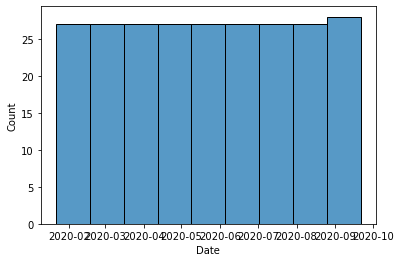

In [165]:
from datetime import datetime
confirmed_daywise.head()
sns.histplot(confirmed_daywise,x='Date')

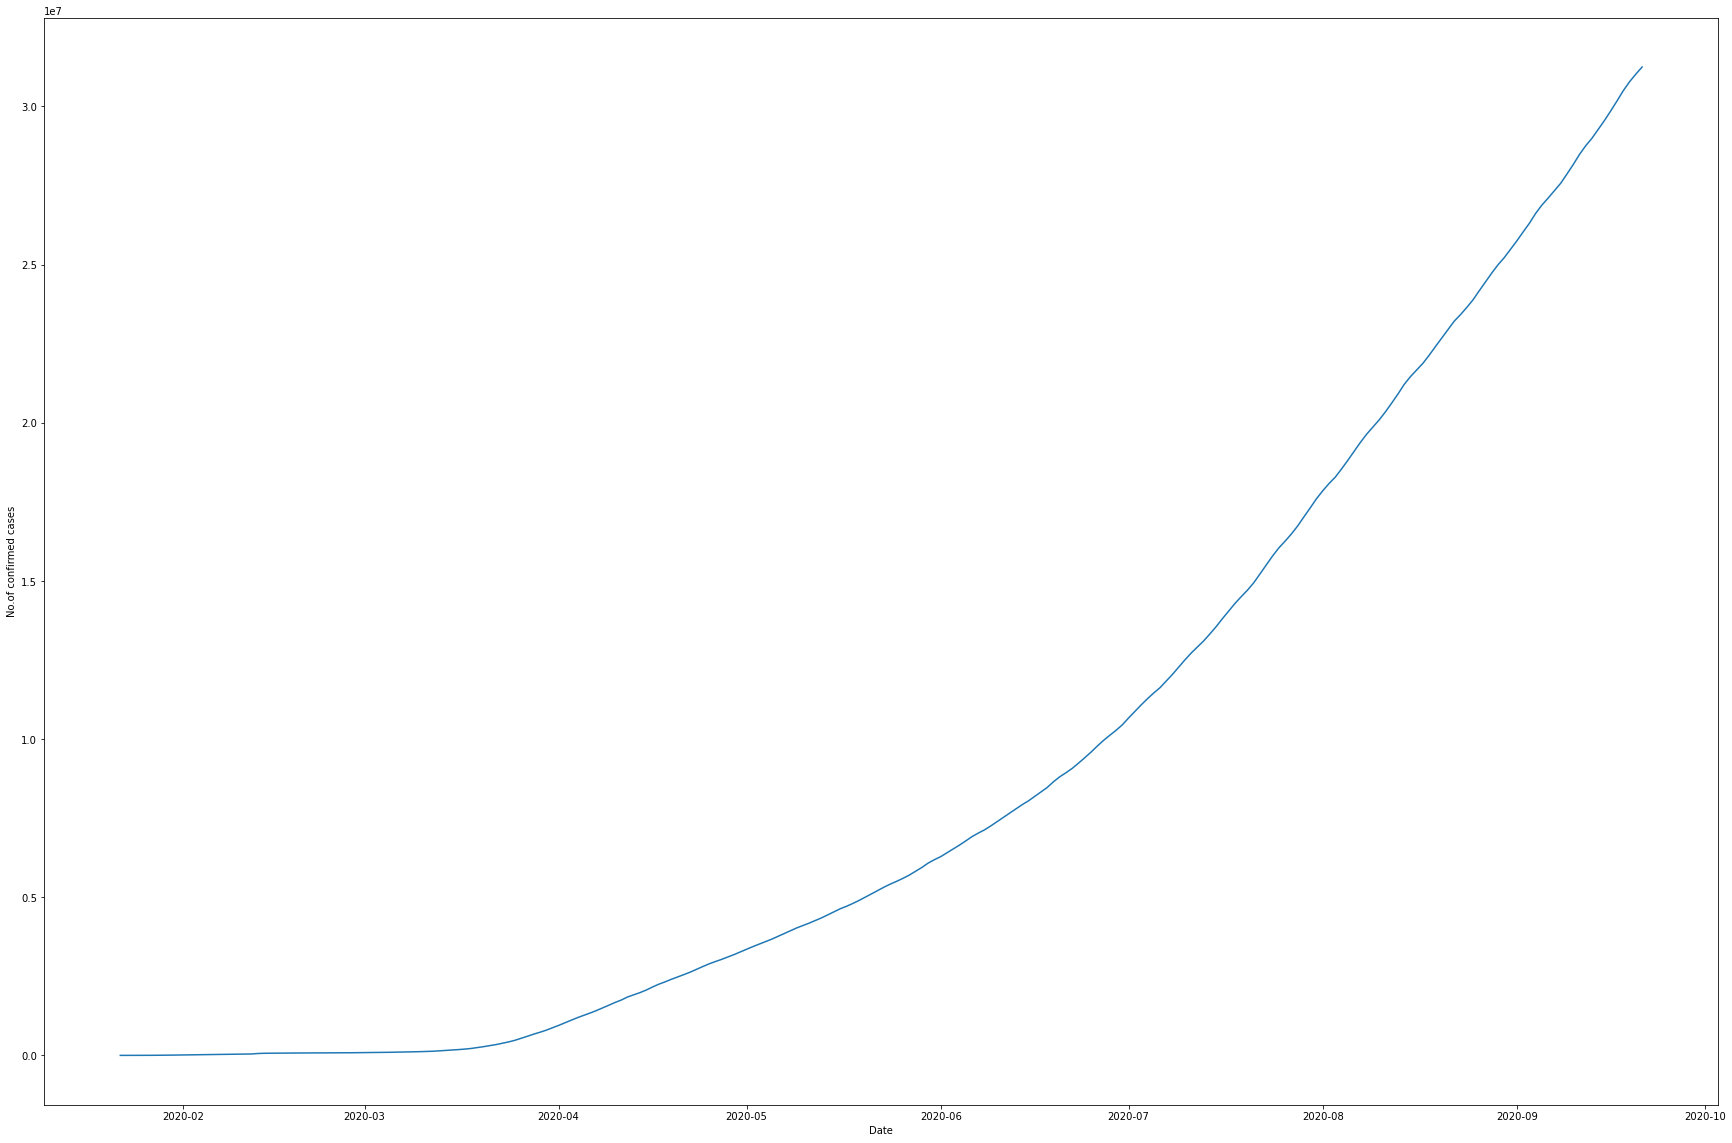

In [166]:
## plot graph
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=30,20
plt.xlabel('Date')
plt.ylabel("No.of confirmed cases")
plt.plot(confirmed_daywise)
#confirmed_daywise

In [167]:
## parsing the date
death_daywise['Date']= pd.to_datetime(death_daywise['Date'], infer_datetime_format=True)
death_daywise=death_daywise.set_index(['Date'])

In [168]:
from datetime import datetime
death_daywise.head()
#sns.histplot(death_daywise,x='Date')

,No_of_death_cases_in_a_day
Date,
2020-01-22,17
2020-01-23,18
2020-01-24,26
2020-01-25,42
2020-01-26,56


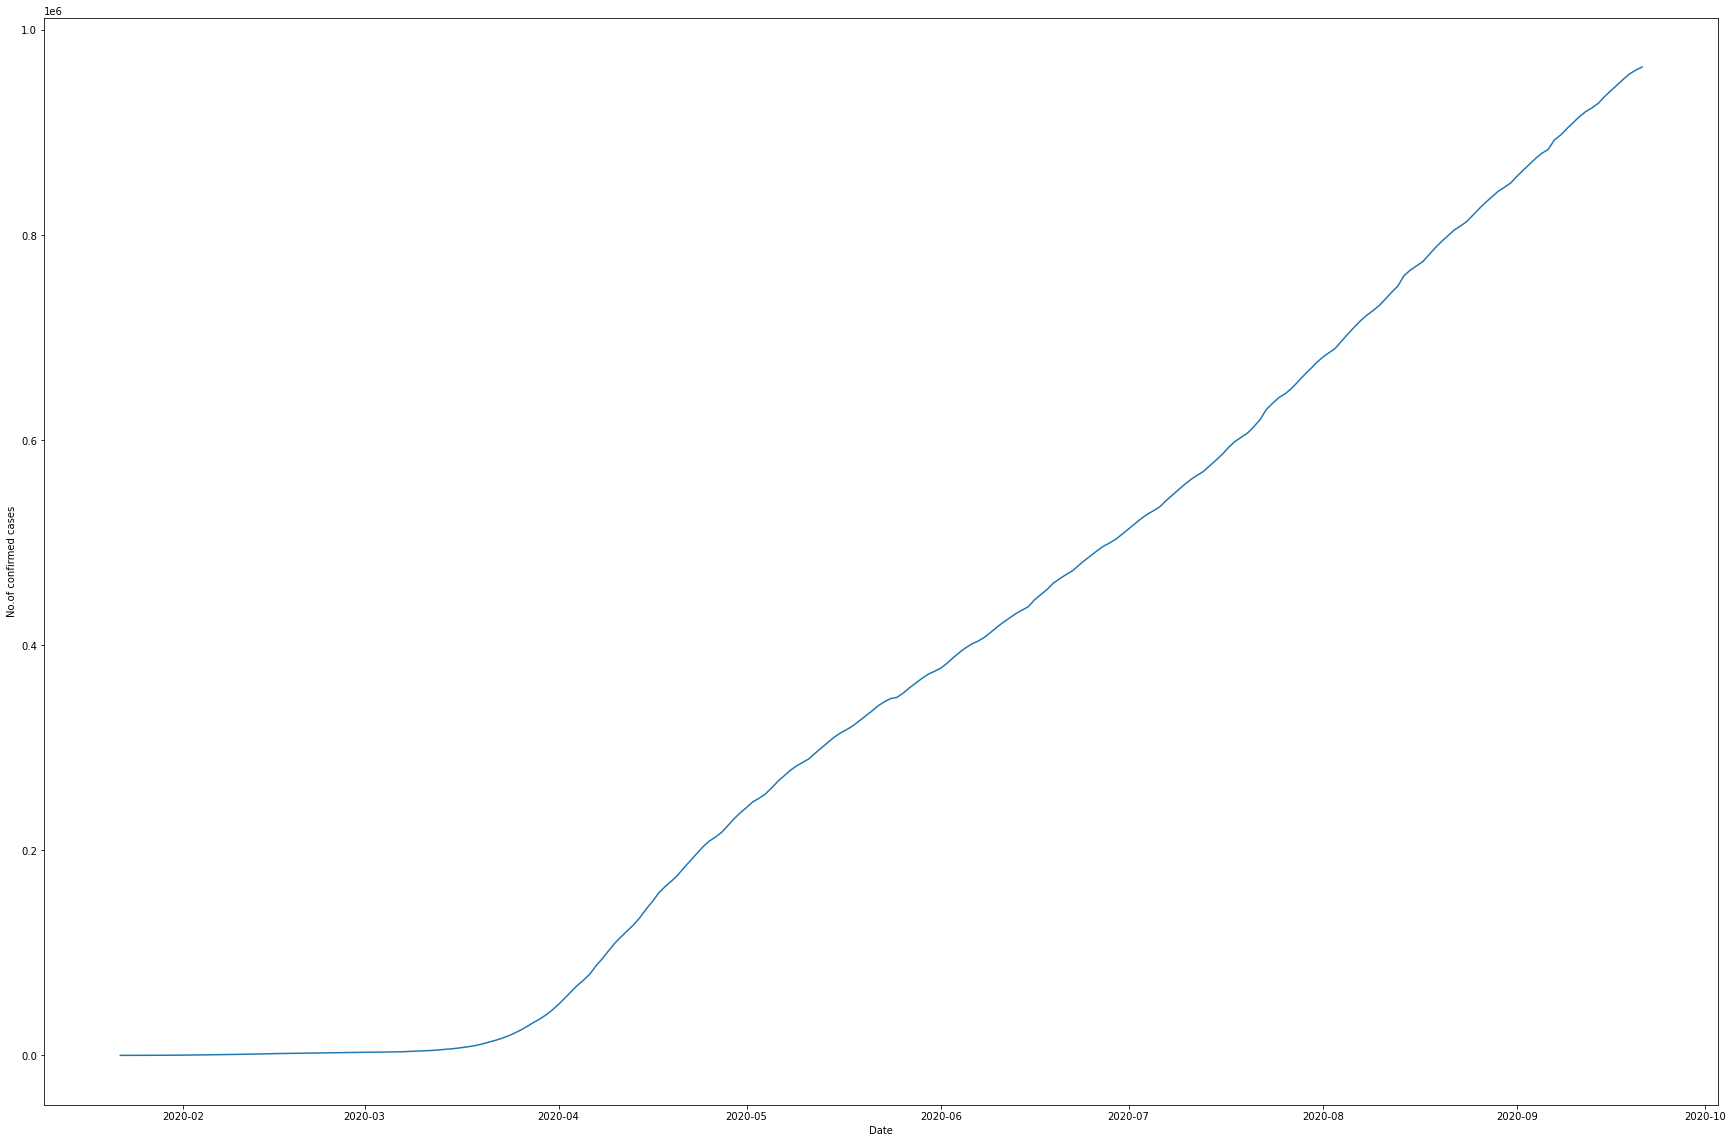

In [169]:
## plot graph
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=30,20
plt.xlabel('Date')
plt.ylabel("No.of confirmed cases")
plt.plot(death_daywise)

In [170]:
## parsing the date
recover_daywise['Date']= pd.to_datetime(recover_daywise['Date'], infer_datetime_format=True)
recover_daywise=recover_daywise.set_index(['Date'])

In [171]:
from datetime import datetime
recover_daywise.head()

,No_of_recovered_cases_in_a_day
Date,
2020-01-22,28
2020-01-23,30
2020-01-24,36
2020-01-25,39
2020-01-26,52


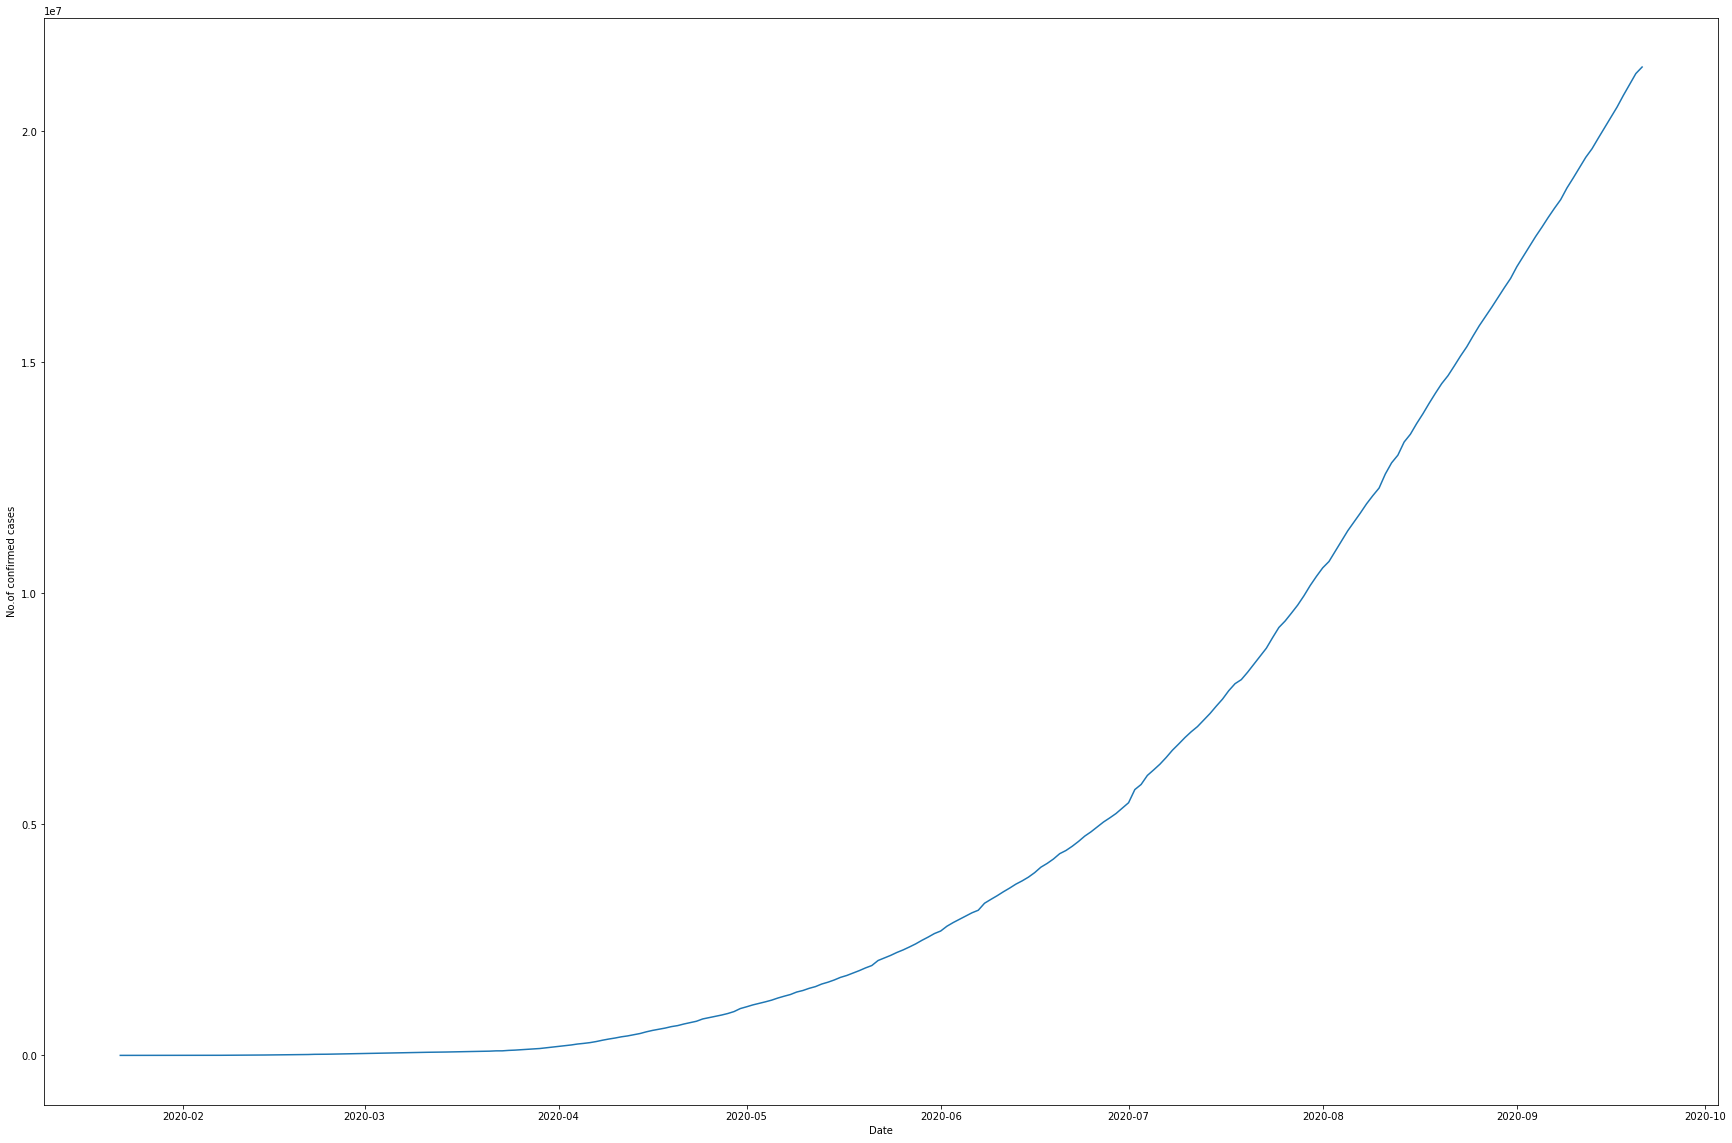

In [172]:
## plot graph
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=30,20
plt.xlabel('Date')
plt.ylabel("No.of confirmed cases")
plt.plot(recover_daywise)

<AxesSubplot:xlabel='Count', ylabel='Date'>

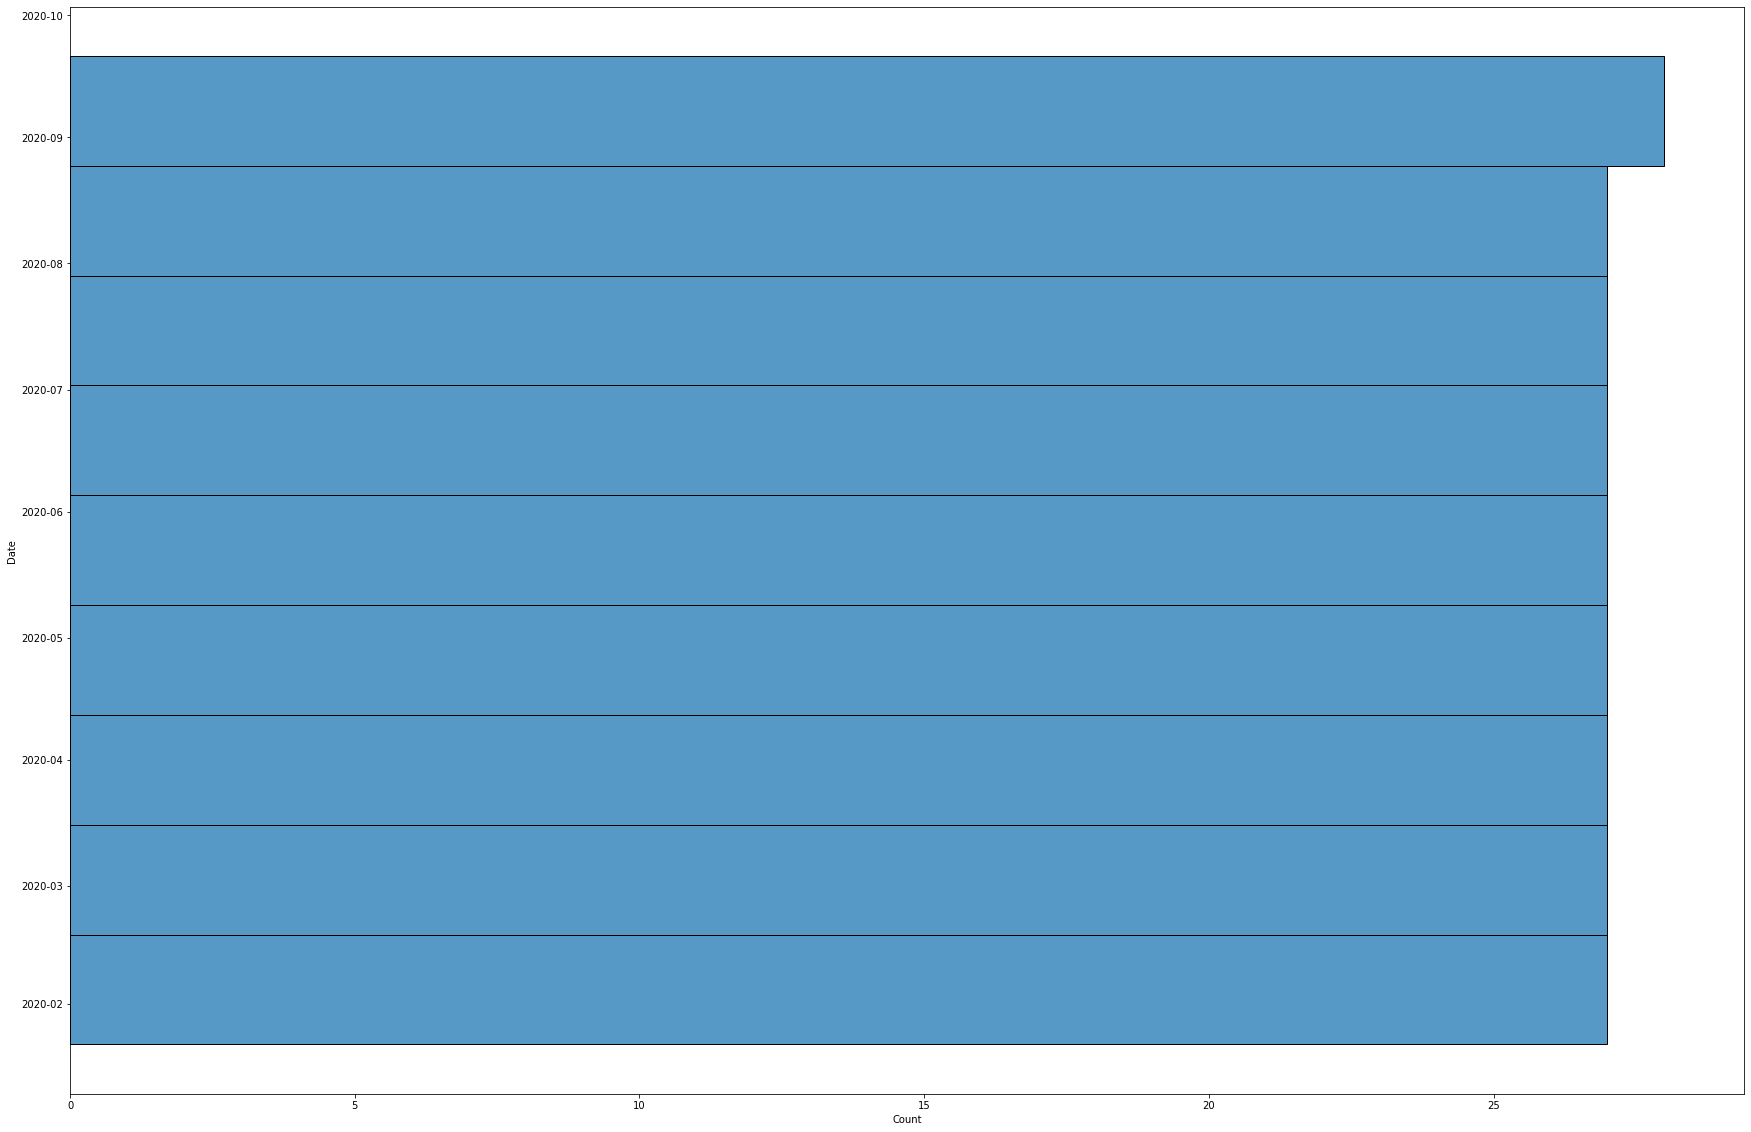

In [173]:
sns.histplot(recover_daywise,y='Date')

# model creation

# confirmed cases for daywise

In [174]:
## Plotting the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

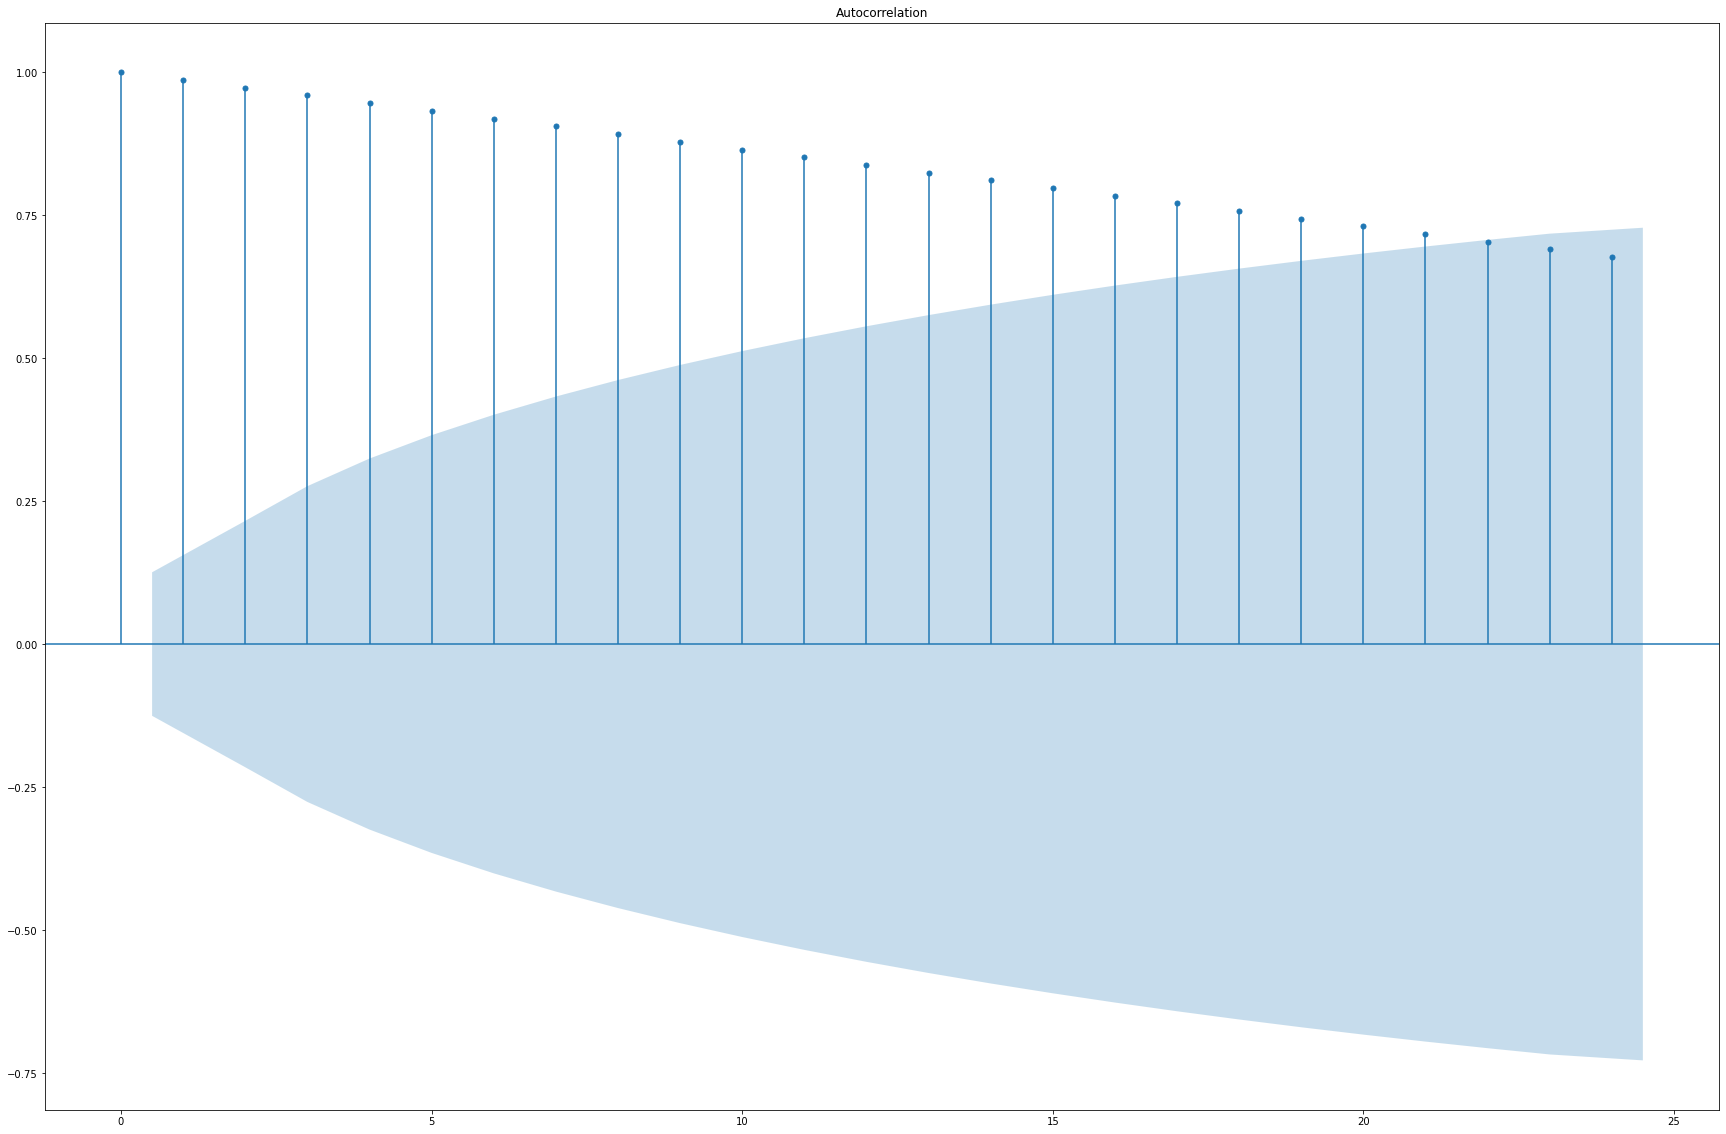

In [175]:
plot_acf(confirmed_daywise);
## from the autocorrelation plot it is clear that given series is not stationary

In [176]:
## making it stationary by taking difference of 1
data1=confirmed_daywise.diff(periods=1)
data1=data1.diff(periods=1)

In [177]:
data1

,No_of_confirmed_cases_in_a_day
Date,
2020-01-22,NaN
2020-01-23,NaN
2020-01-24,188.0
2020-01-25,206.0
2020-01-26,191.0
...,...
2020-09-17,9357.0
2020-09-18,10857.0
2020-09-19,-43000.0


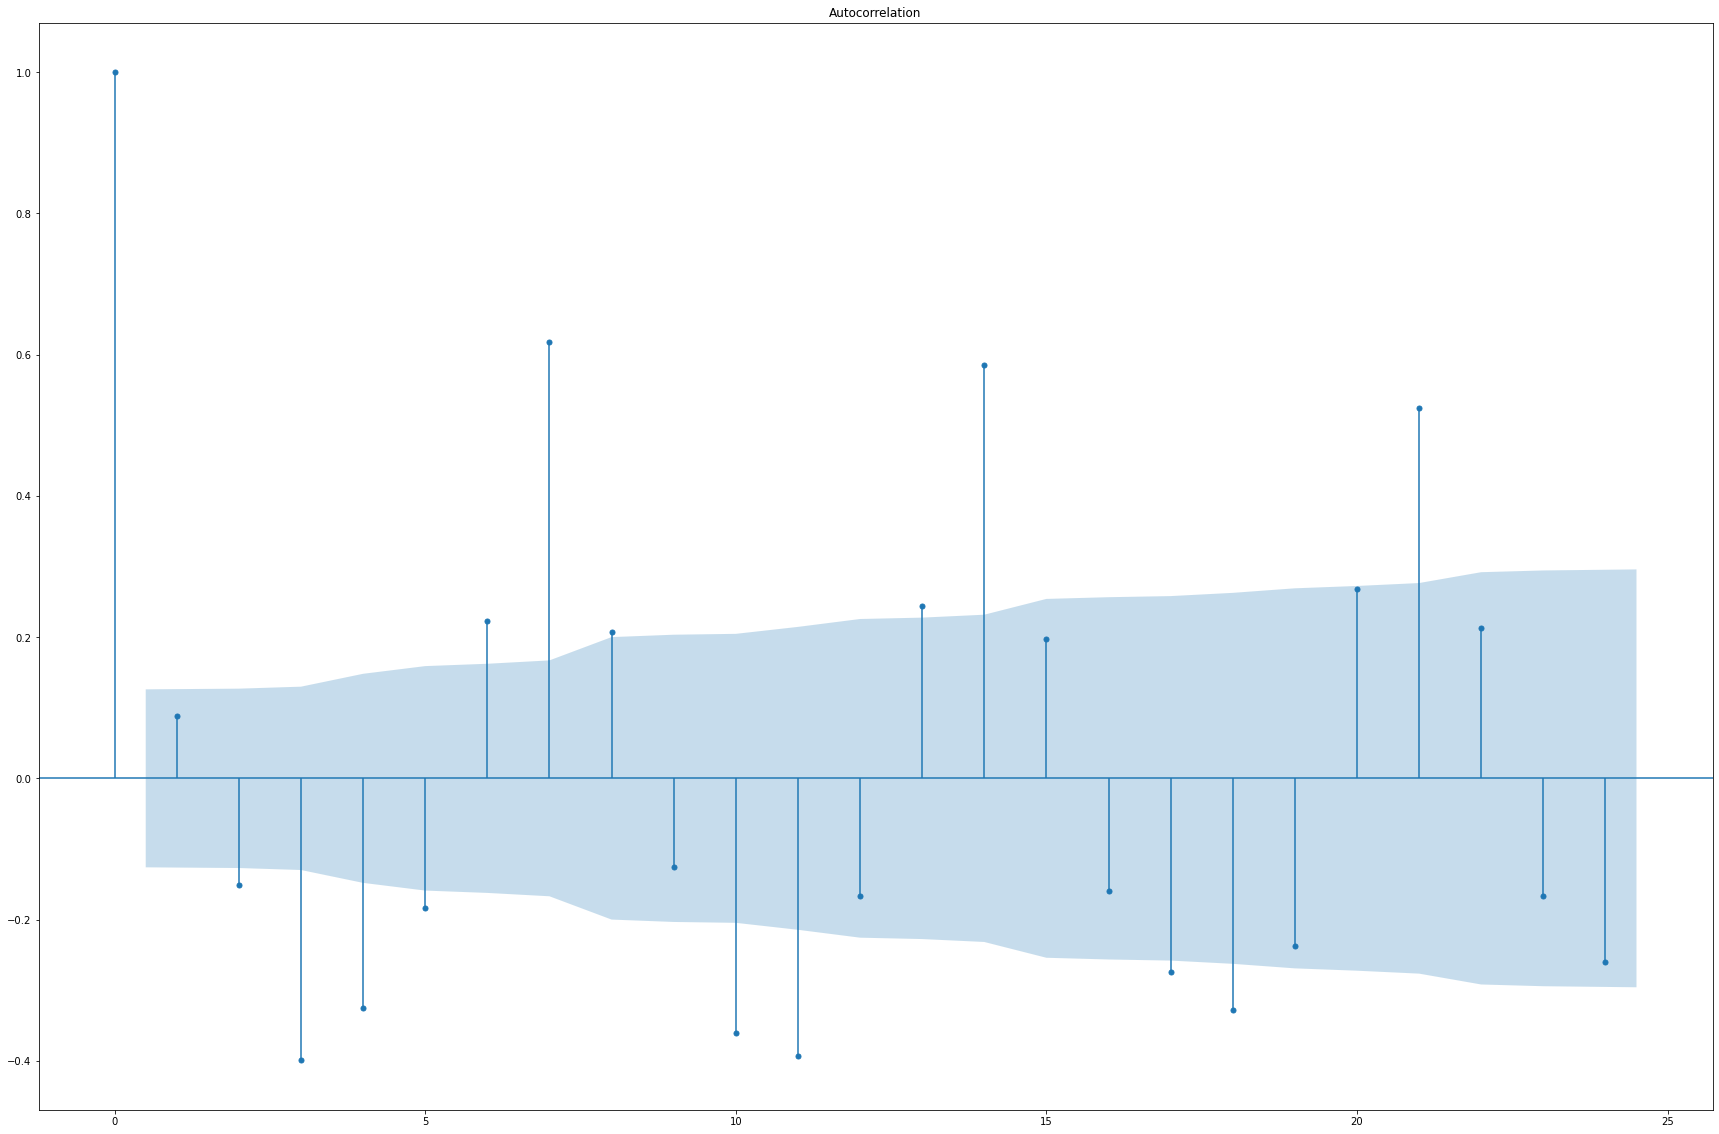

In [178]:
#data1=data1.iloc[2:]
data1.dropna(inplace=True)
plot_acf(data1);

In [179]:
data1.shape

(242, 1)

In [180]:
## Creating training and test sets
train=confirmed_daywise[:121]
test=confirmed_daywise[121:]

In [278]:
test1=test[:100]
test1=test1.values.tolist()
test1

[[5218664],
 [5323977],
 [5419242],
 [5506311],
 [5598982],
 [5701734],
 [5821183],
 [5942378],
 [6080002],
 [6187396],
 [6282981],
 [6403944],
 [6522099],
 [6649014],
 [6779972],
 [6915760],
 [7027674],
 [7130092],
 [7254608],
 [7389151],
 [7527086],
 [7656149],
 [7791901],
 [7925110],
 [8044663],
 [8186473],
 [8328685],
 [8468705],
 [8648774],
 [8806595],
 [8935273],
 [9073260],
 [9238052],
 [9409498],
 [9587195],
 [9778566],
 [9957498],
 [10119644],
 [10275992],
 [10449832],
 [10666930],
 [10874417],
 [11077903],
 [11271954],
 [11454850],
 [11620802],
 [11831641],
 [12043466],
 [12271553],
 [12503942],
 [12720381],
 [12913142],
 [13105192],
 [13326971],
 [13557898],
 [13810459],
 [14052261],
 [14290096],
 [14504853],
 [14710995],
 [14944726],
 [15225164],
 [15507881],
 [15789074],
 [16044757],
 [16258079],
 [16484206],
 [16736727],
 [17025889],
 [17306523],
 [17596559],
 [17847574],
 [18076718],
 [18278778],
 [18537524],
 [18808754],
 [19093901],
 [19374812],
 [19634542],
 [19858792

In [181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121 entries, 2020-01-22 to 2020-05-21
Data columns (total 1 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   No_of_confirmed_cases_in_a_day  121 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


## Arima model

In [182]:
## importing the library
from statsmodels.tsa.arima_model import ARIMA

In [183]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(3,2,0))

model_arima_fit = model_arima.fit()

In [184]:
## evaluate the model
print(model_arima_fit.aic)

2416.733800511728


In [279]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=100)[0]

In [280]:
predictions

array([ 5213294.88753513,  5309672.73711519,  5404404.64638521,
        5502295.15378483,  5606143.66235703,  5715000.29731371,
        5825136.45863931,  5932833.82510778,  6036927.86044868,
        6139386.33339183,  6243694.98941694,  6352342.52401872,
        6465202.85935623,  6579844.98445936,  6693393.53079426,
        6804534.33212822,  6914280.20123891,  7025078.91869222,
        7139015.56553329,  7256416.74858606,  7375777.46118931,
        7494947.53992577,  7612658.14740427,  7729314.66169584,
        7846576.13483496,  7966112.84015978,  8088462.37276629,
        8212758.62795457,  8337444.48073666,  8461396.38374558,
        8584656.12033383,  8708302.57530763,  8833624.79828866,
        8961221.95919621,  9090652.33209758,  9220824.55911397,
        9350799.99291901,  9480421.94041013,  9610356.02685682,
        9741564.41014338,  9874622.03821587, 10009356.32888086,
       10145029.17992088, 10280890.39295064, 10416692.05586499,
       10552815.2386756 , 10689955.45471

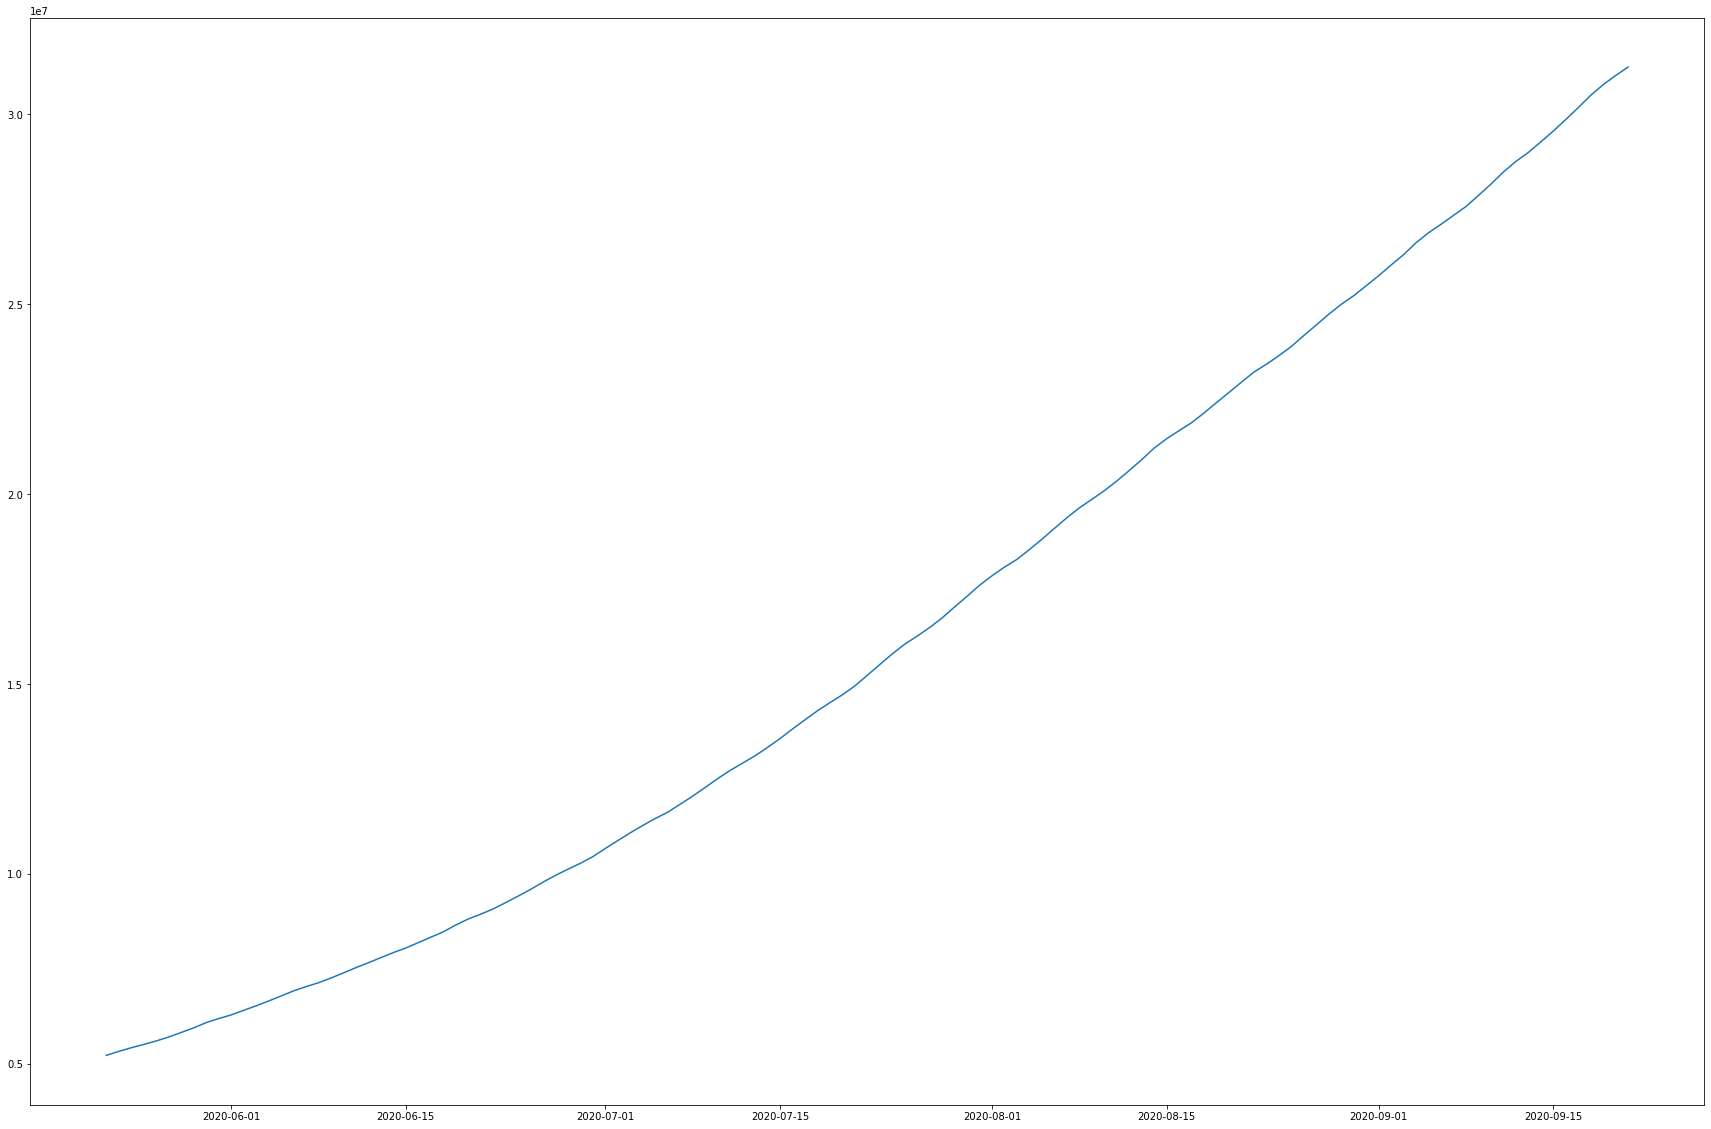

In [187]:
## plotting the test data
plt.plot(test)

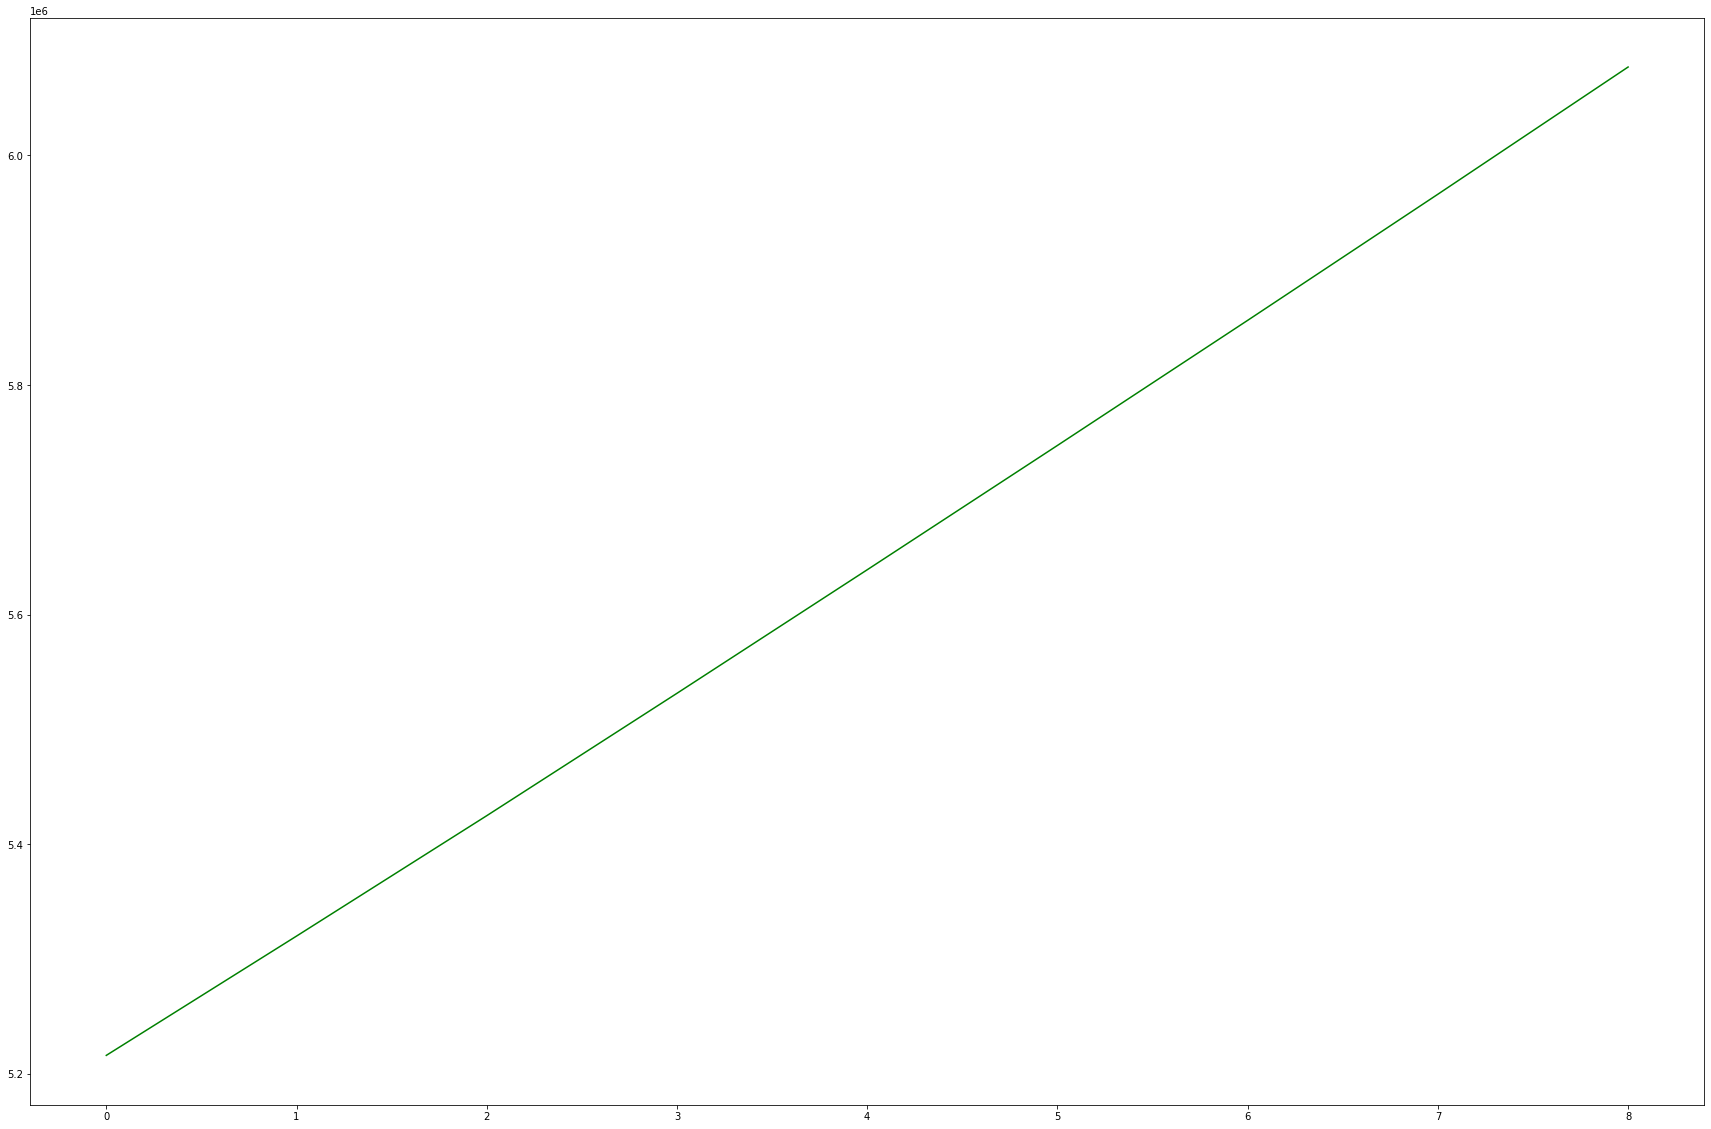

In [188]:
## plotting the forecasted values
plt.plot(predictions,color='green')

In [189]:
## Getting the optimal values of p,q an d
import itertools

p =d= q=range(0,5)

pdq = list(itertools.product(p,d,q))


In [190]:
## (3,2,2) has the low aic score
import warnings
warnings.filterwarnings('ignore')
for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3805.226586282685
(0, 0, 1) 3647.4144699246744
(0, 0, 2) 3493.801214501203
(0, 0, 3) 3353.227034182397
(0, 0, 4) 3232.3118604230294
(0, 1, 0) 2877.8380854116485
(0, 1, 1) 2744.1793511804926
(0, 1, 2) 2651.2549871637684
(0, 1, 3) 2605.6506125214237
(0, 1, 4) 2576.7110071761253
(0, 2, 0) 2421.0627216850703
(0, 2, 1) 2420.412294329813
(0, 2, 2) 2418.578809154253
(0, 2, 3) 2418.082494153818
(0, 2, 4) 2411.797829384152
(1, 0, 0) 3008.6833758759267
(1, 1, 0) 2449.4461470965853
(1, 2, 0) 2421.1908760843785
(1, 2, 1) 2418.5089547650755
(1, 2, 2) 2419.730329082053
(1, 2, 3) 2410.992110723278
(2, 1, 0) 2450.302733081583
(2, 1, 1) 2450.009536181842
(2, 1, 2) 2451.502353985751
(2, 1, 3) 2439.597234885743
(2, 2, 0) 2421.5788627508505
(2, 2, 1) 2419.01264049412
(2, 2, 2) 2392.533297473383
(2, 2, 3) 2391.6808298962424
(3, 1, 0) 2451.4127512577725
(3, 1, 2) 2424.291357308989
(3, 1, 3) 2425.121446451333
(3, 2, 0) 2416.733800511728
(3, 2, 1) 2417.0440758150125
(3, 2, 2) 2409.6705705148606
(4, 

In [191]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(2,2,3))

model_arima_fit = model_arima.fit()

In [192]:
## evaluate the model
print(model_arima_fit.aic)

2391.6808298962424


In [197]:
## predicting the out of sample points
predictions1 = model_arima_fit.forecast(steps=100)[0]

In [199]:

predictions1

array([ 5213294.88753513,  5309672.73711519,  5404404.64638521,
        5502295.15378483,  5606143.66235703,  5715000.29731371,
        5825136.45863931,  5932833.82510778,  6036927.86044868,
        6139386.33339183,  6243694.98941694,  6352342.52401872,
        6465202.85935623,  6579844.98445936,  6693393.53079426,
        6804534.33212822,  6914280.20123891,  7025078.91869222,
        7139015.56553329,  7256416.74858606,  7375777.46118931,
        7494947.53992577,  7612658.14740427,  7729314.66169584,
        7846576.13483496,  7966112.84015978,  8088462.37276629,
        8212758.62795457,  8337444.48073666,  8461396.38374558,
        8584656.12033383,  8708302.57530763,  8833624.79828866,
        8961221.95919621,  9090652.33209758,  9220824.55911397,
        9350799.99291901,  9480421.94041013,  9610356.02685682,
        9741564.41014338,  9874622.03821587, 10009356.32888086,
       10145029.17992088, 10280890.39295064, 10416692.05586499,
       10552815.2386756 , 10689955.45471

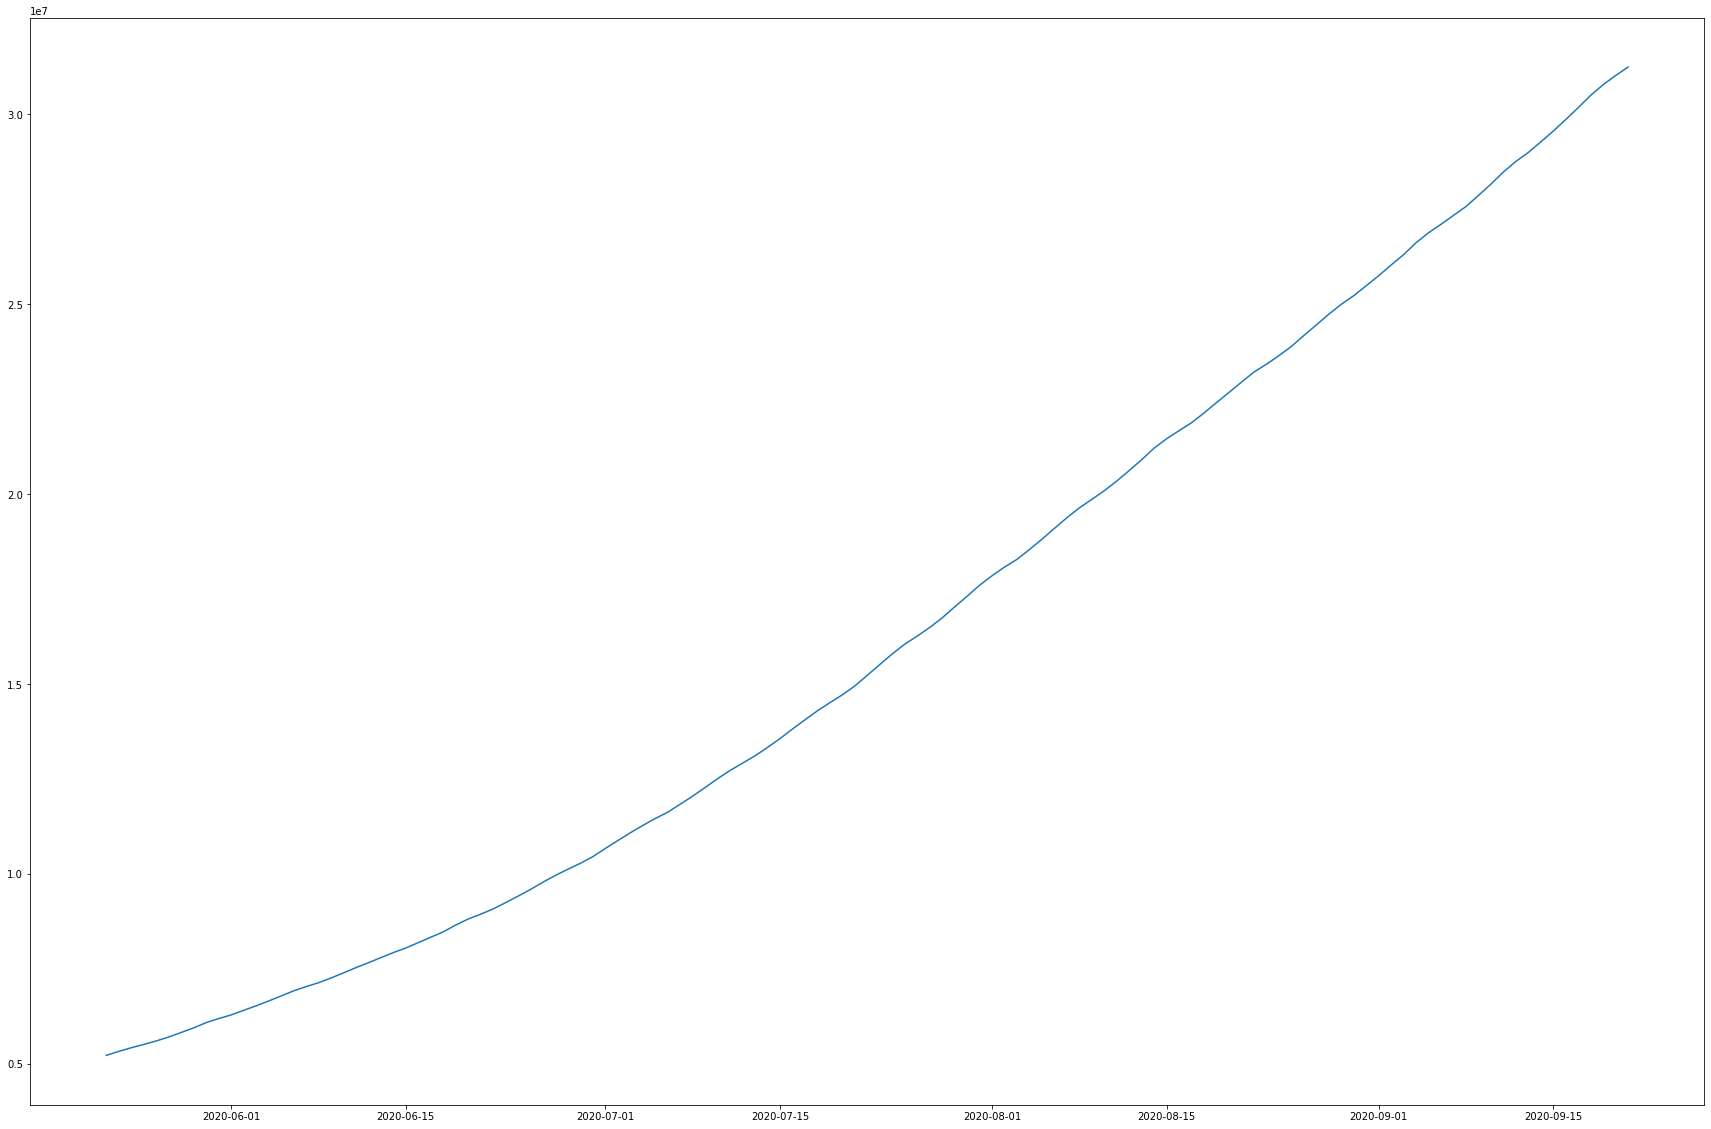

In [195]:
## plotting the test data
plt.plot(test)

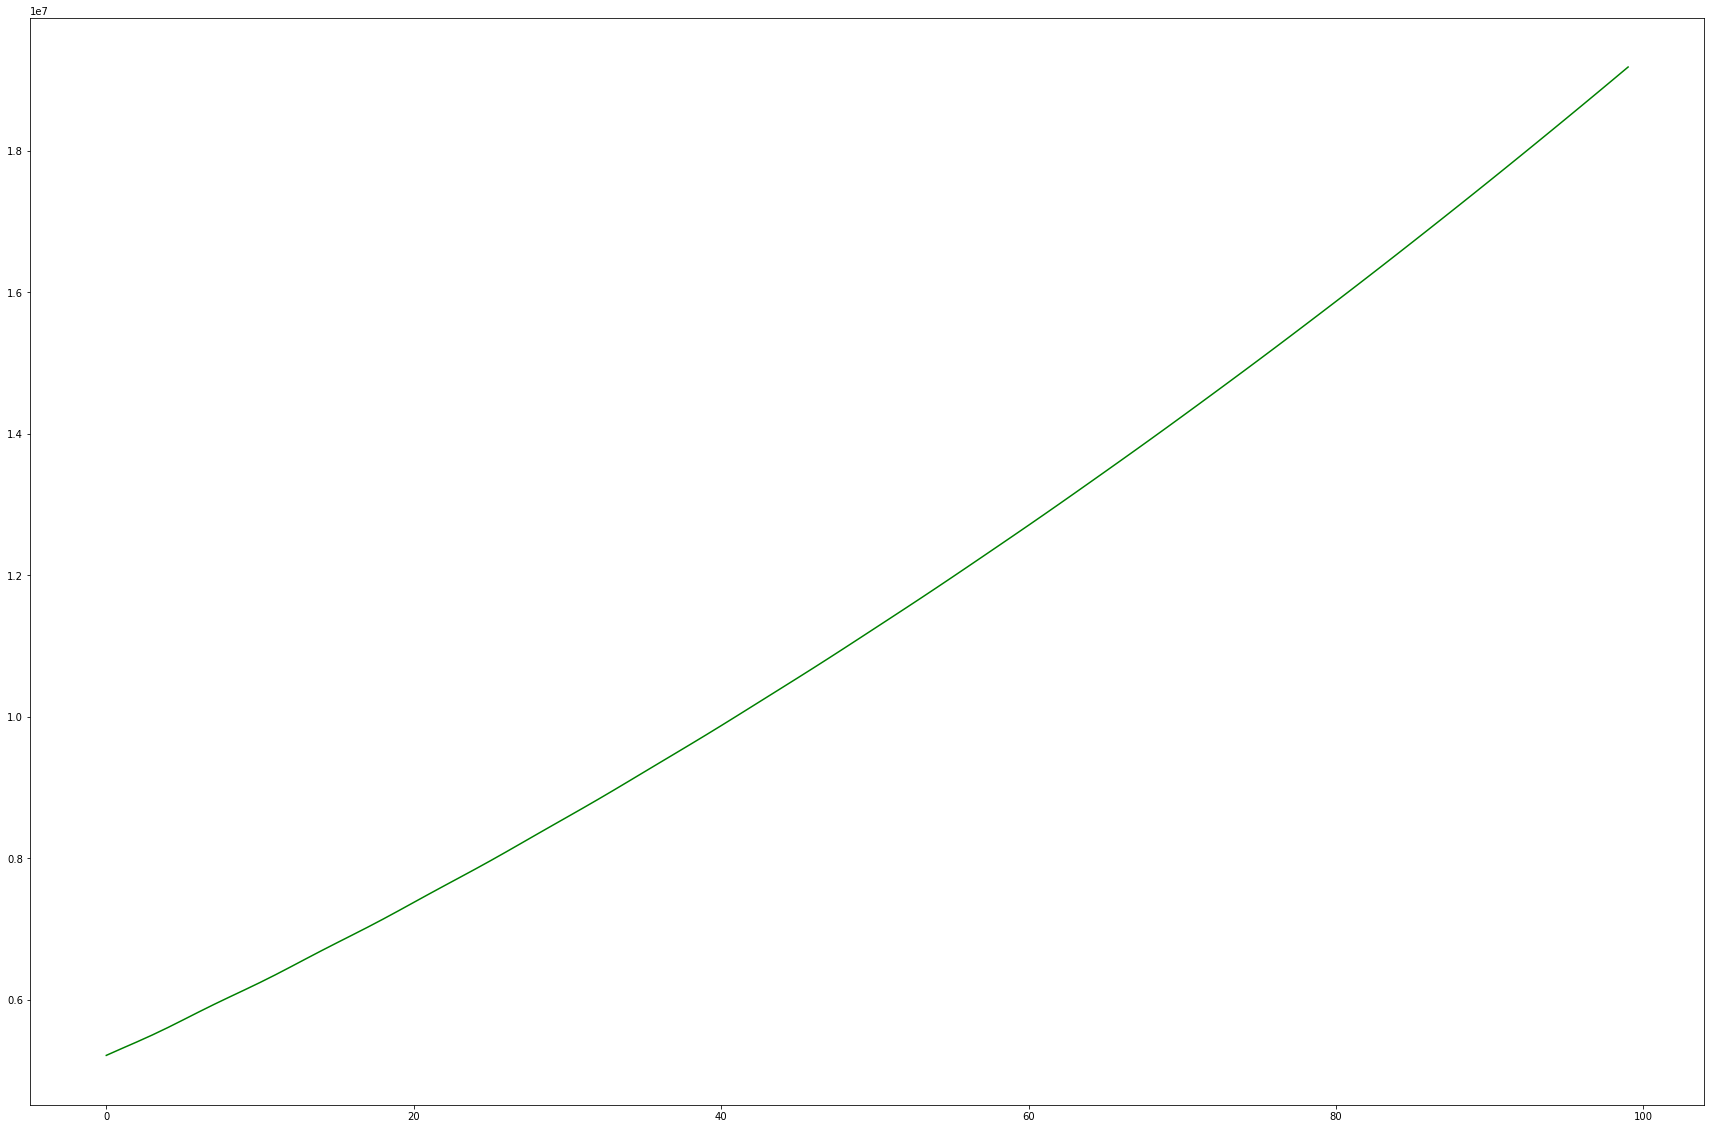

In [200]:
## plotting the forecasted values
plt.plot(predictions1,color='green')

In [281]:
test1
predictions1
forecast_errors = [test1[i]-predictions1[i] for i in range(len(test1))]
print('Forecast Errors: %s' % forecast_errors)


Forecast Errors: [array([5369.11246487]), array([14304.26288481]), array([14837.35361479]), array([4015.84621517]), array([-7161.66235703]), array([-13266.29731371]), array([-3953.45863931]), array([9544.17489222]), array([43074.13955132]), array([48009.66660817]), array([39286.01058306]), array([51601.47598128]), array([56896.14064377]), array([69169.01554064]), array([86578.46920574]), array([111225.66787178]), array([113393.79876109]), array([105013.08130778]), array([115592.43446671]), array([132734.25141394]), array([151308.53881069]), array([161201.46007423]), array([179242.85259573]), array([195795.33830416]), array([198086.86516504]), array([220360.15984022]), array([240222.62723371]), array([255946.37204543]), array([311329.51926334]), array([345198.61625442]), array([350616.87966617]), array([364957.42469237]), array([404427.20171134]), array([448276.04080379]), array([496542.66790242]), array([557741.44088603]), array([606698.00708099]), array([639222.05958987]), array([6656

In [282]:
#from statistics import *
mean_forecast_error = np.mean(forecast_errors)
mean_forecast_error

2027143.392824171

In [283]:
bias = sum(forecast_errors) * 1.0/len(test1)
print('Bias: %f' % bias)

Bias: 2027143.392824


In [284]:
mean_absolute_error = np.mean(np.abs(forecast_errors) )

In [285]:
from sklearn.metrics import mean_absolute_error
test1=test1
predictions1=predictions1
mae = mean_absolute_error(test1, predictions1)
print('MAE: %f' % mae)

MAE: 2027631.021190


# Recovered cases daywise

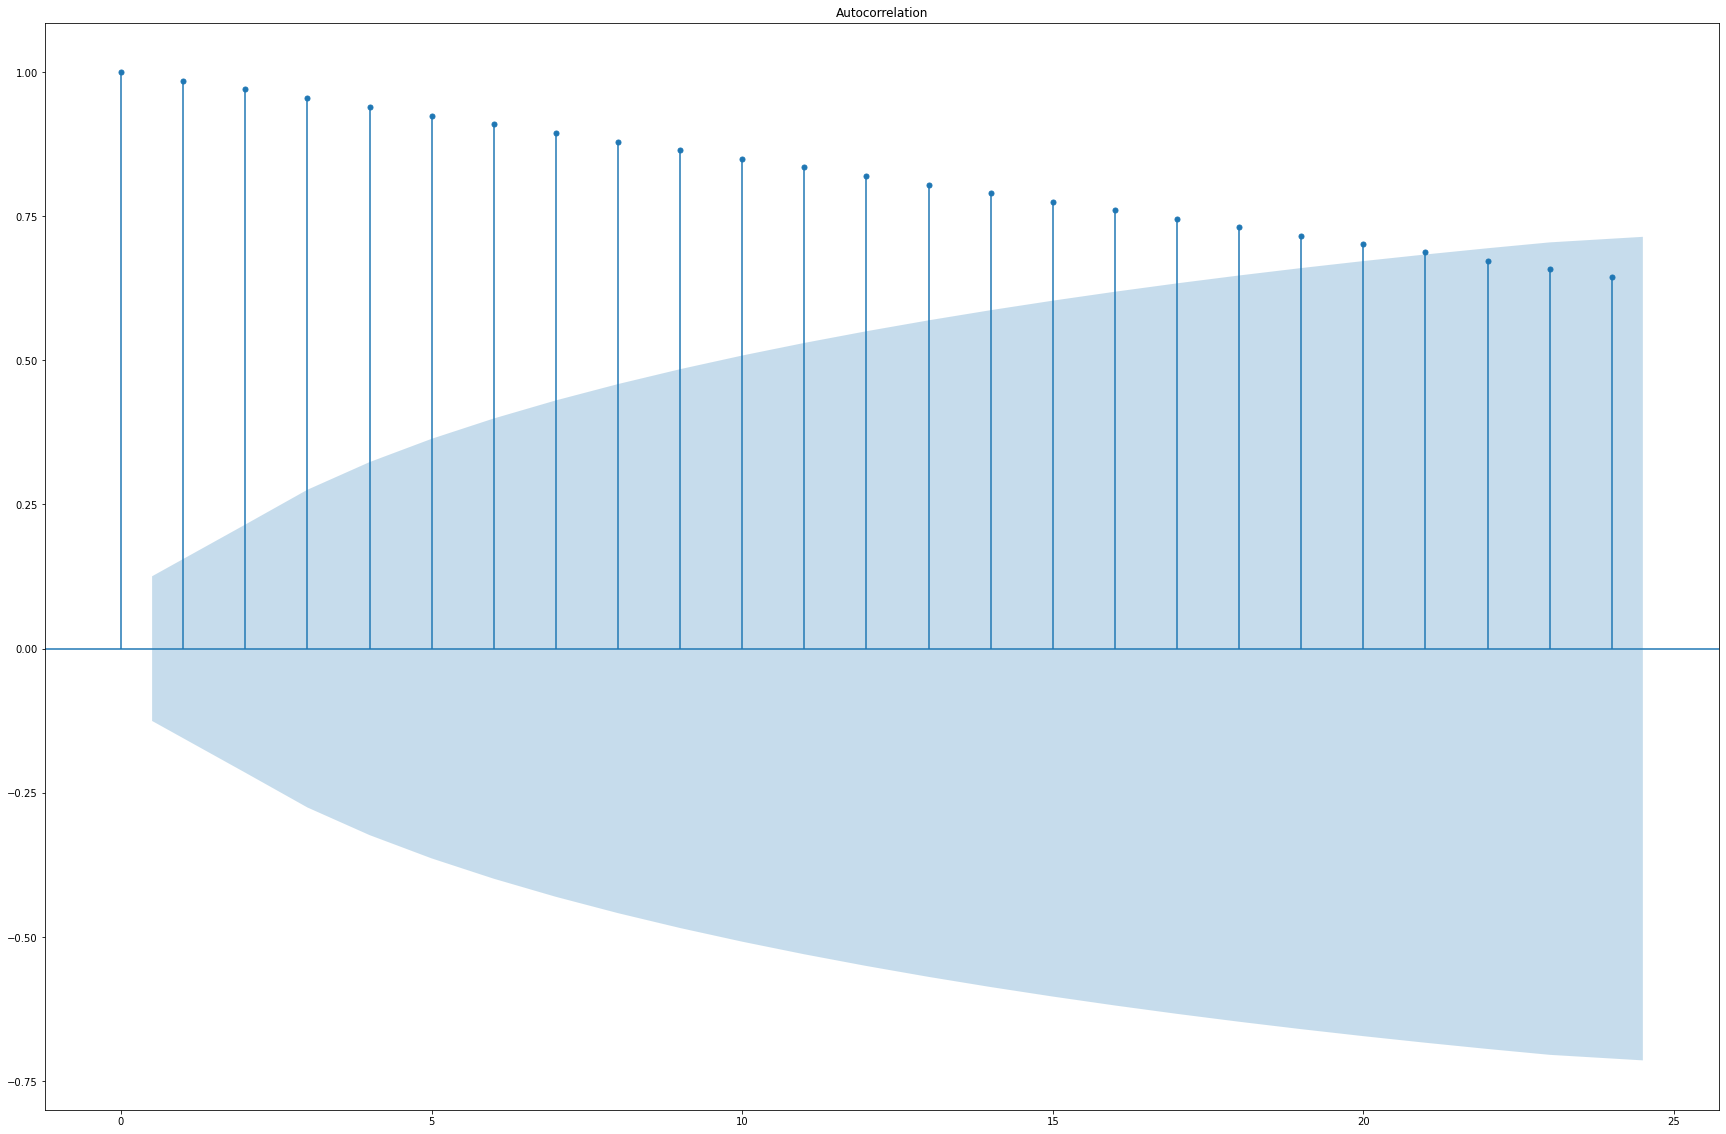

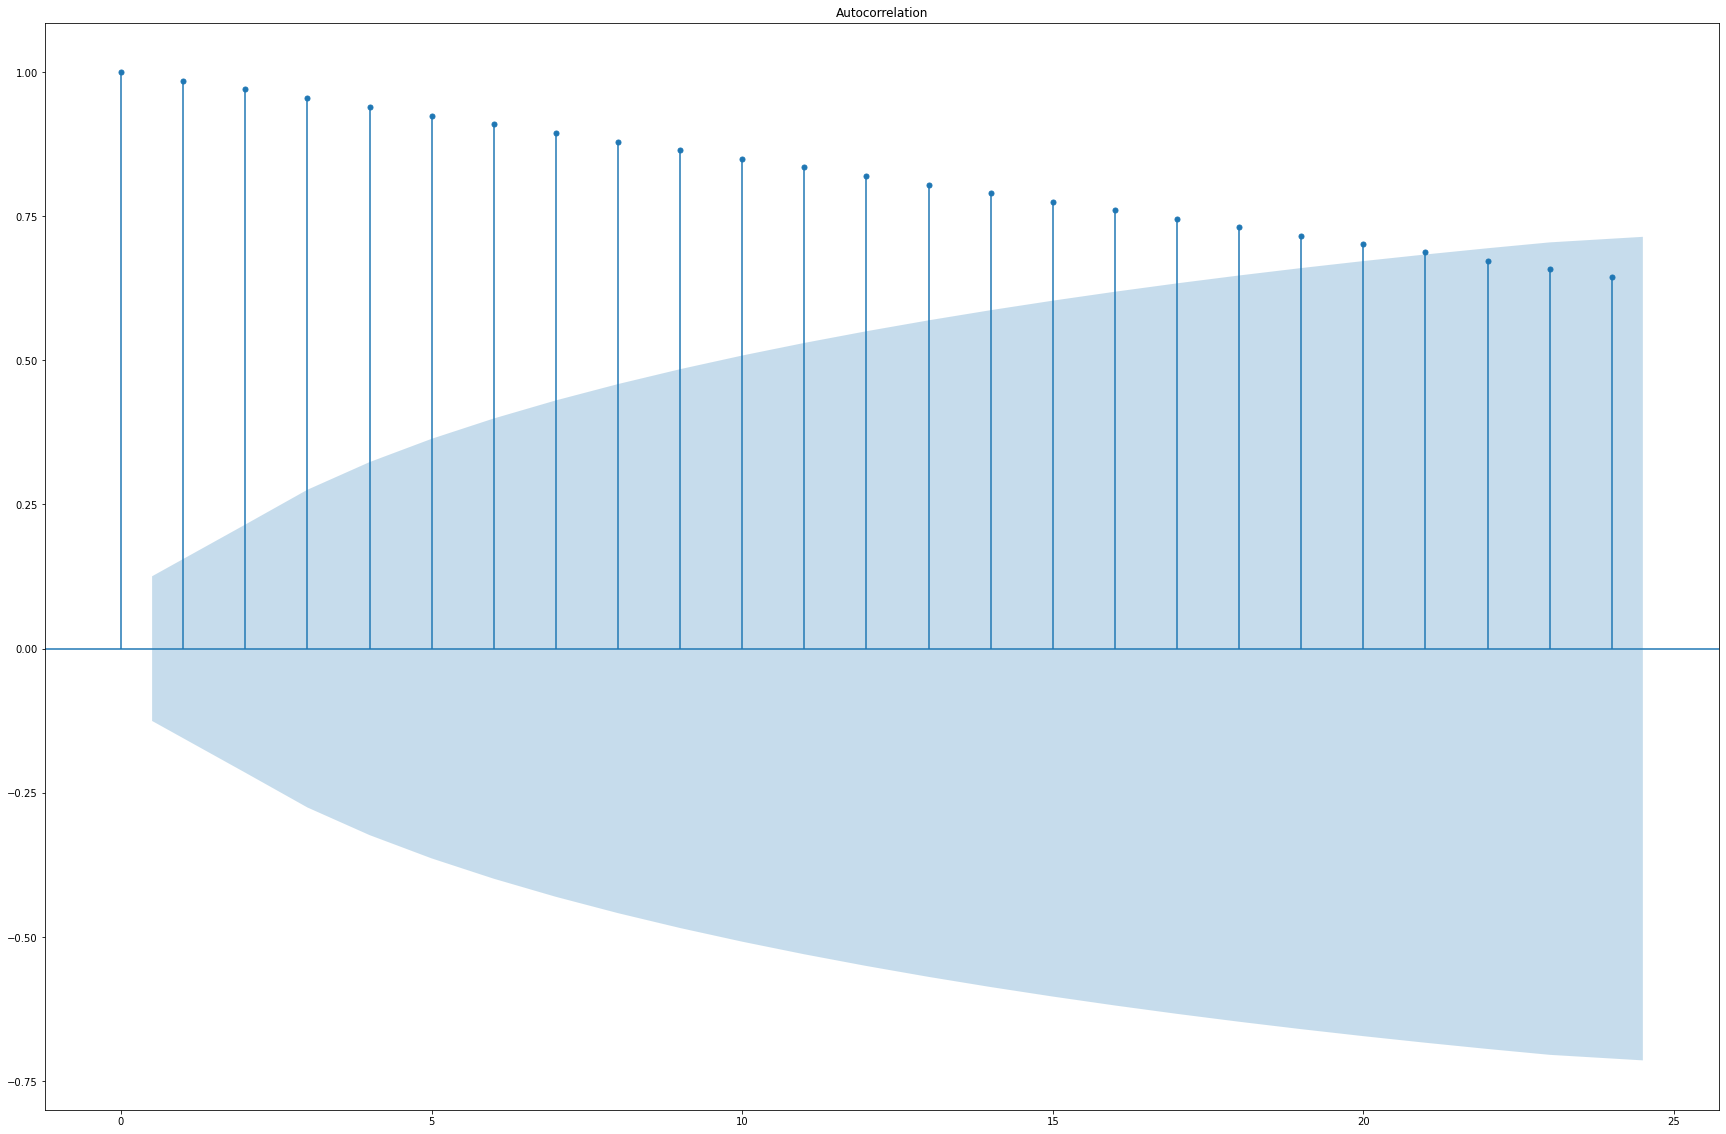

In [73]:
plot_acf(recover_daywise)

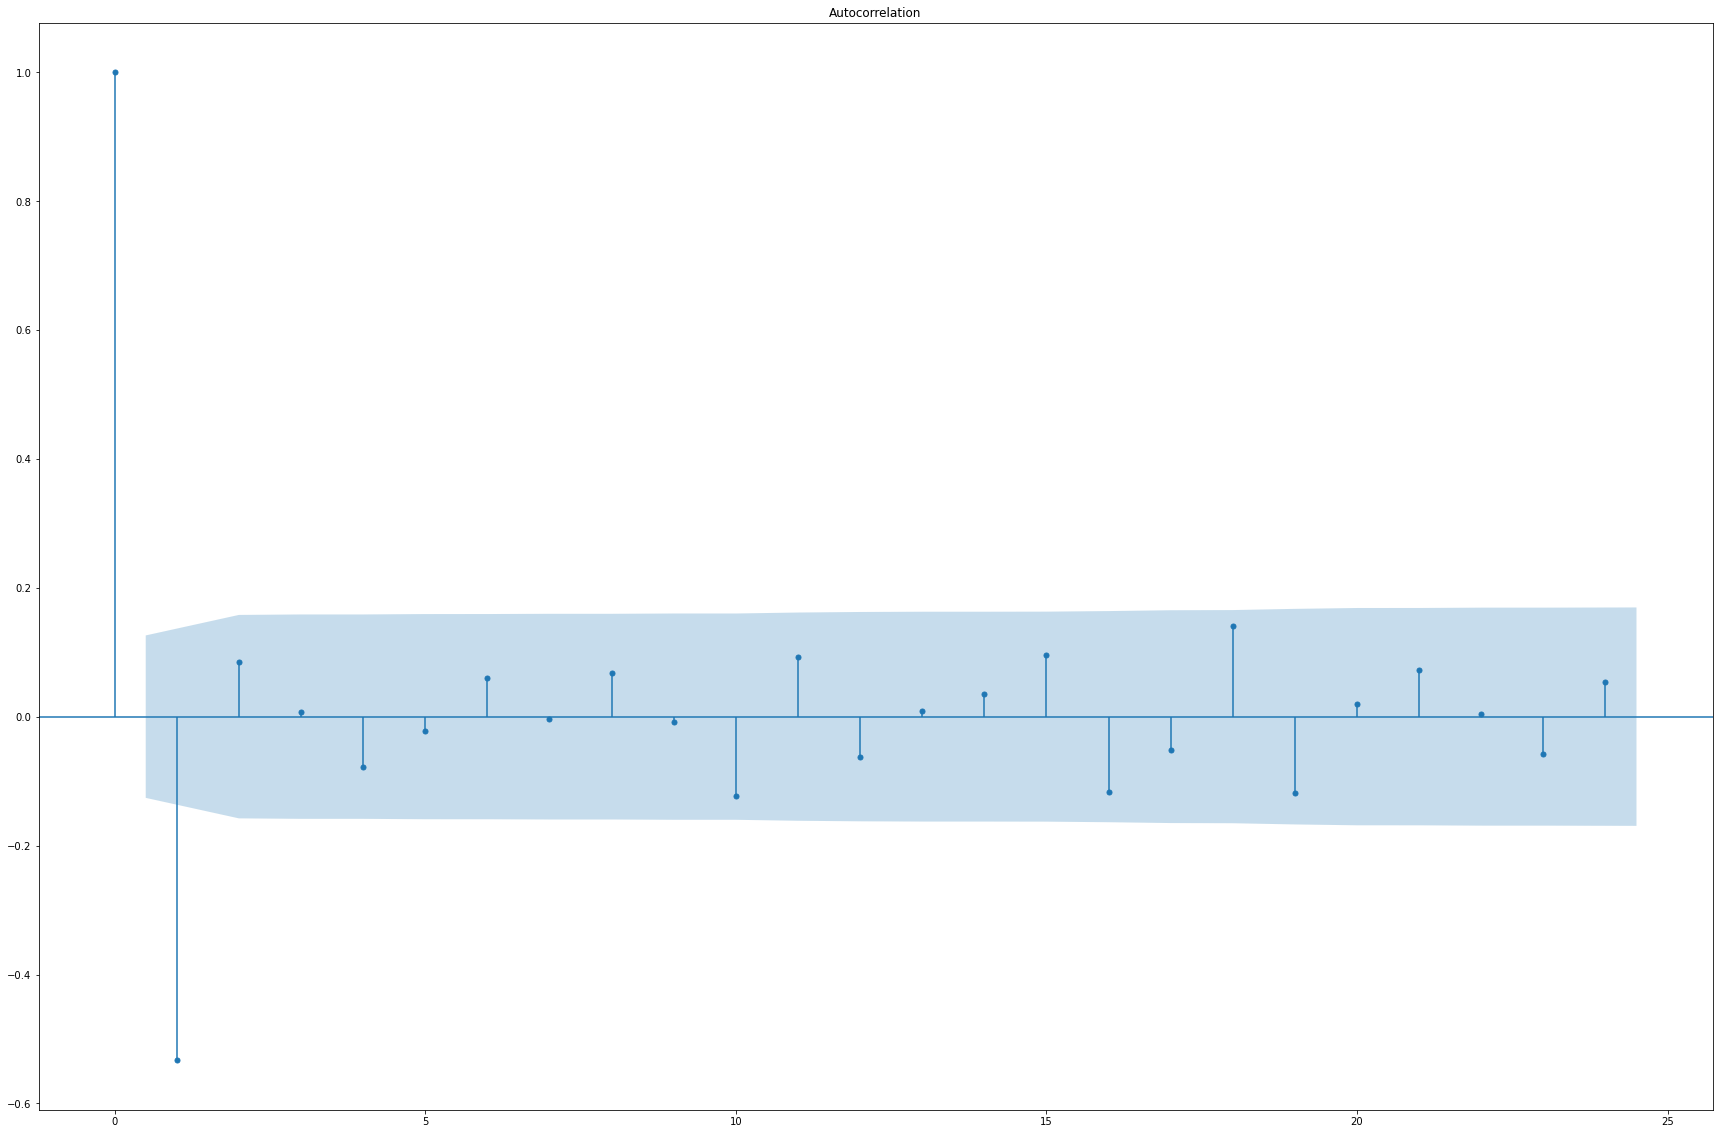

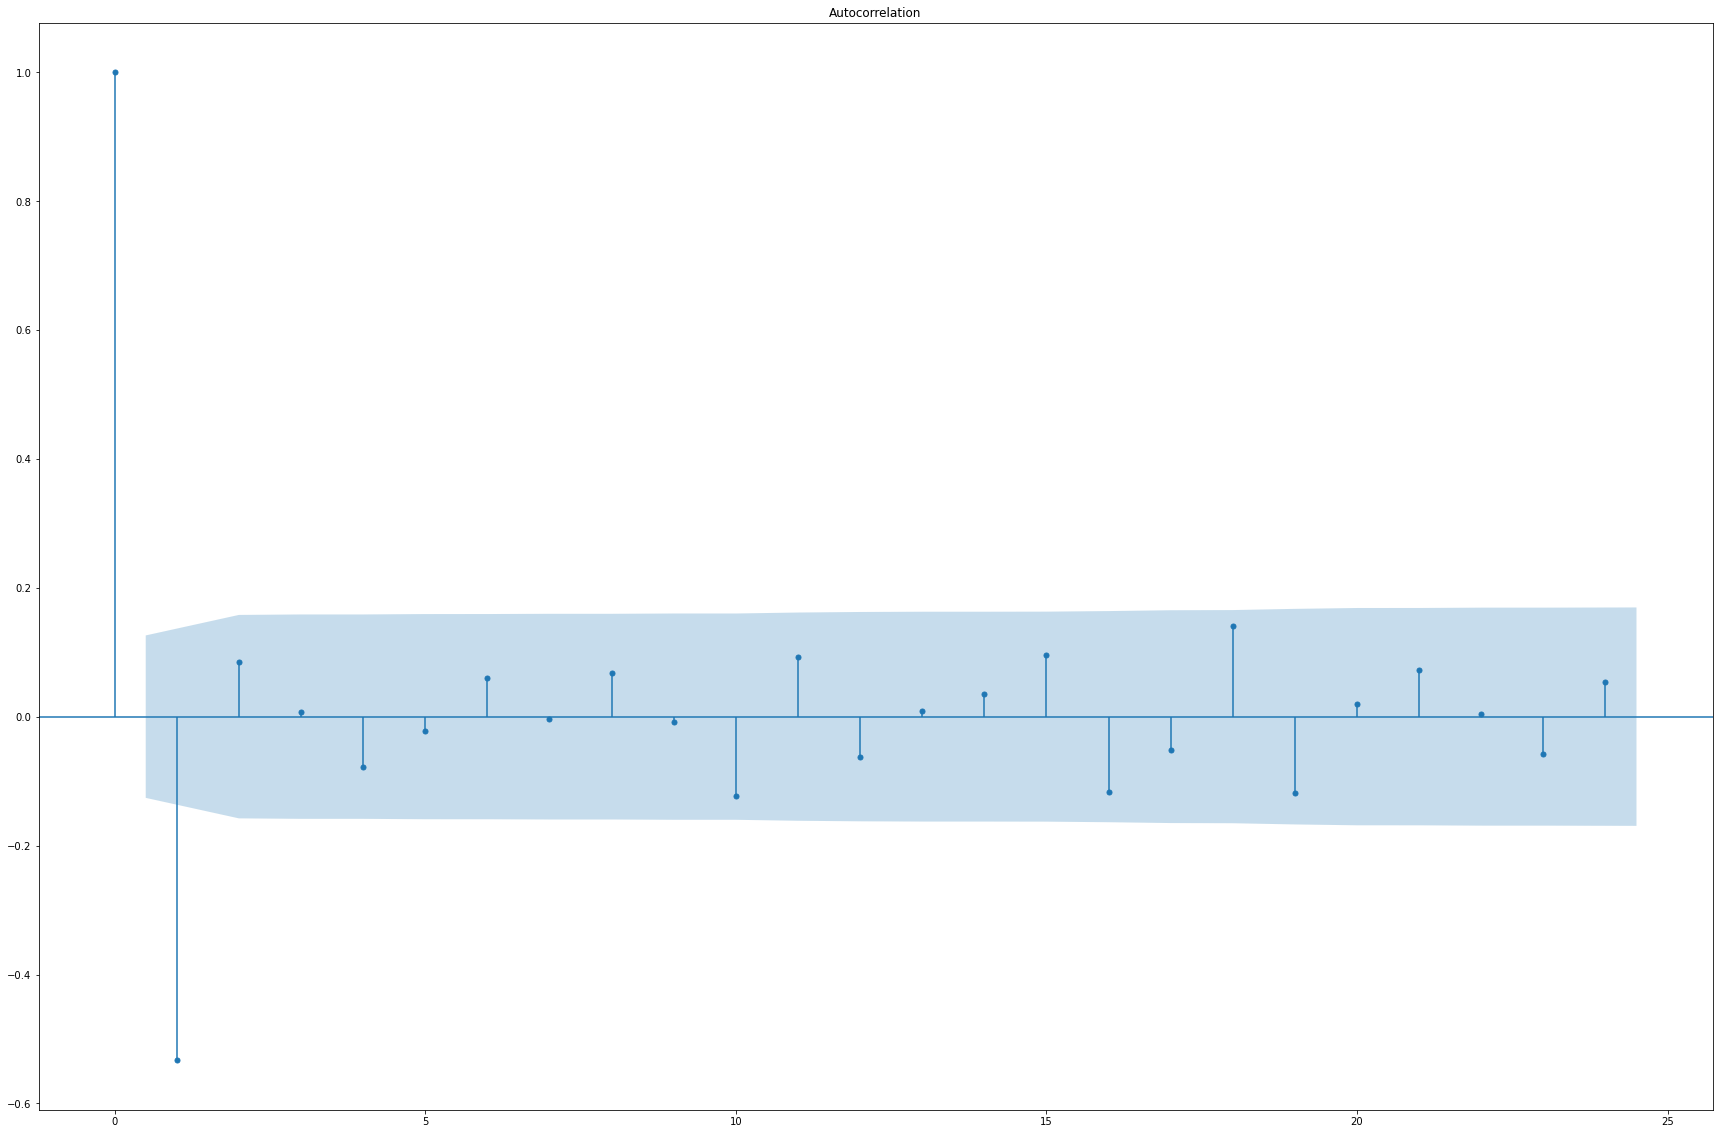

In [74]:
## making it stationary by taking difference of 1
data2=recover_daywise.diff(periods=1)
data2=data2.diff(periods=1)
data2.dropna(inplace=True)
plot_acf(data2)

In [75]:
data2

,No_of_recovered_cases_in_a_day
Date,
2020-01-24,4.0
2020-01-25,-3.0
2020-01-26,10.0
2020-01-27,-4.0
2020-01-28,37.0
...,...
2020-09-17,-9712.0
2020-09-18,32558.0
2020-09-19,-13994.0


In [76]:
## Creating training and test sets
train=recover_daywise[:121]
test=recover_daywise[121:]

In [77]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(3,2,0))

model_arima_fit = model_arima.fit()

In [78]:
## evaluate the model
print(model_arima_fit.aic)

2398.3520230624836


In [79]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=9)[0]
predictions

array([2000738.58257147, 2055525.59636876, 2111883.96674527,
       2167747.71636484, 2224666.12012439, 2281732.23309012,
       2339451.04990776, 2397495.57184906, 2456087.3018901 ])

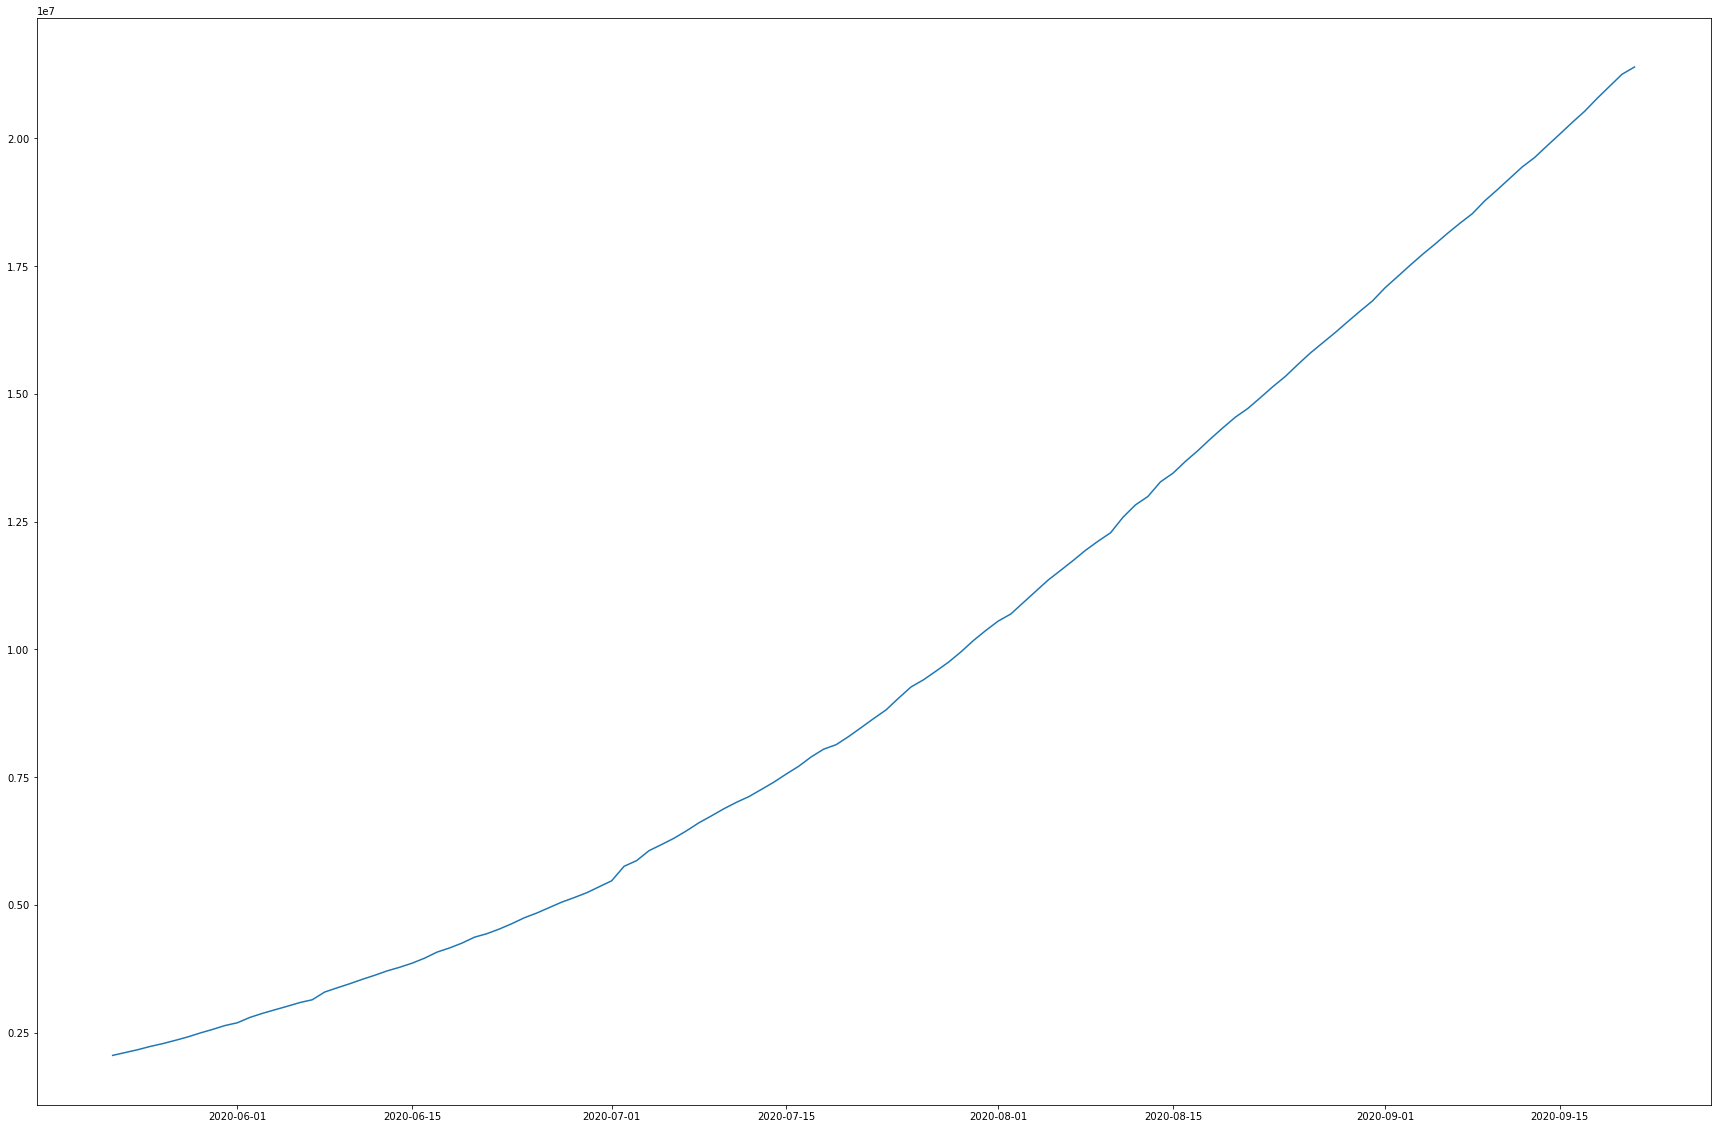

In [80]:
## plotting the test data
plt.plot(test)

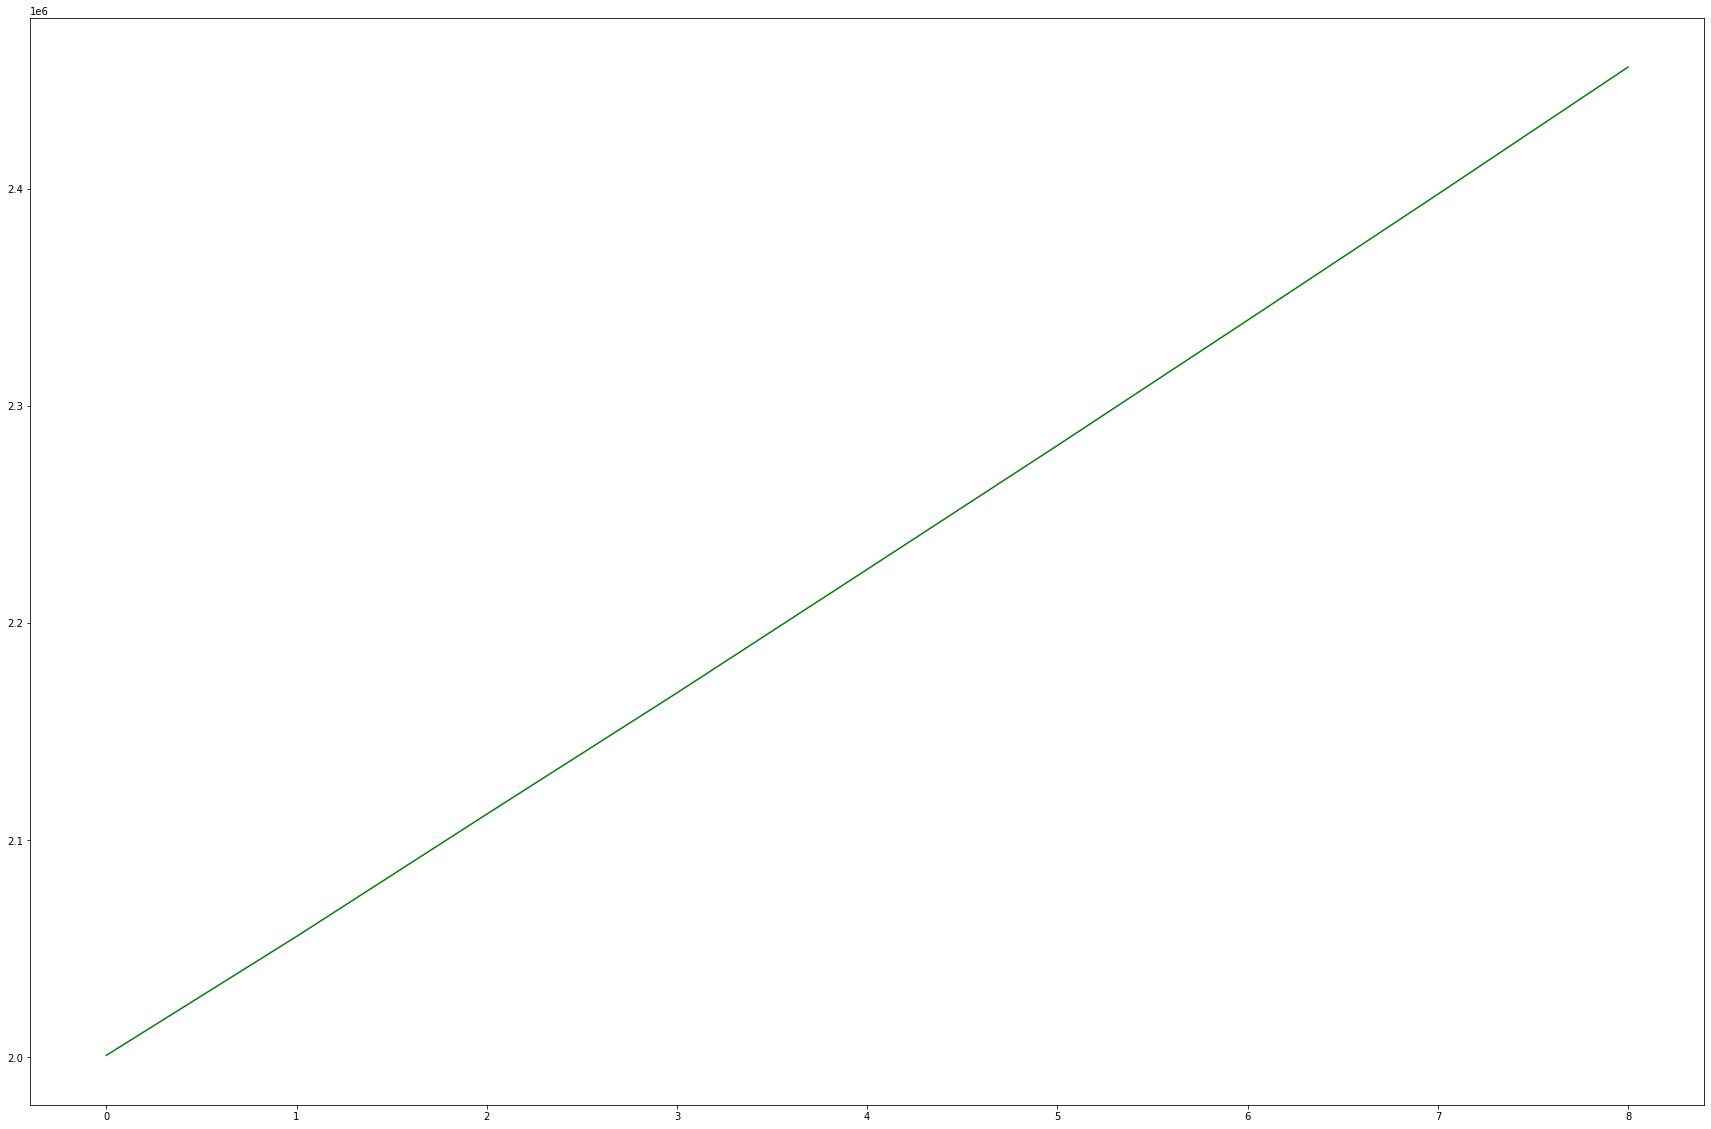

In [81]:
plt.plot(predictions,color='green')

In [82]:


for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3546.7300613928387
(0, 0, 1) 3390.0602175793106
(0, 0, 2) 3242.5598723265757
(0, 0, 3) 3109.031289816059
(0, 0, 4) 3060.3387884111025
(0, 1, 0) 2696.1403474016834
(0, 1, 1) 2612.7232248128985
(0, 1, 2) 2561.0653852241157
(0, 1, 3) 2515.7311998793766
(0, 1, 4) 2500.6924516844356
(0, 2, 0) 2448.1484111882637
(0, 2, 1) 2385.9168606508088
(0, 2, 2) 2386.691977762703
(0, 2, 3) 2386.886167044658
(0, 2, 4) 2383.653716092207
(1, 0, 0) 2812.540919800734
(1, 1, 0) 2469.8158749123486
(1, 1, 1) 2420.9068200751144
(1, 1, 2) 2433.9547158436517
(1, 1, 3) 2421.0972154539195
(1, 1, 4) 2417.463753698803
(1, 2, 0) 2401.3215447138036
(1, 2, 1) 2386.436476723242
(1, 2, 2) 2387.280867792383
(1, 2, 3) 2388.4197637716775
(2, 0, 0) 2514.2095340709975
(2, 1, 0) 2427.6821903193213
(2, 1, 1) 2420.8885598578718
(2, 2, 0) 2398.9886298944725
(2, 2, 1) 2387.413725694124
(2, 2, 2) 2388.9075273728295
(2, 2, 3) 2383.901437493272
(2, 2, 4) 2379.7992209844856
(3, 1, 0) 2426.4983136875044
(3, 2, 0) 2398.352023062

In [83]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(4,2,3))

model_arima_fit=model_arima.fit()

In [84]:
## evaluate the model
print(model_arima_fit.aic)

2368.016888382525


In [85]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=100)[0]
predictions

array([1998882.36500686, 2050557.39076426, 2105049.79041319,
       2160786.84400516, 2217916.38366023, 2275943.14330497,
       2333233.93932266, 2390829.38400911, 2447701.01530519,
       2505656.23623449, 2563916.97048408, 2623567.53960574,
       2683584.1707068 , 2744300.16211205, 2805018.8329477 ,
       2866049.91745776, 2927304.64823552, 2989097.8640857 ,
       3051486.30299721, 3114489.87393214, 3178039.42883907,
       3241990.28564048, 3306323.04401185, 3370993.15666906,
       3436102.10662911, 3501671.71999251, 3567772.50332538,
       3634369.22208521, 3701449.69975999, 3768960.30833567,
       3836894.2271776 , 3905250.03901822, 3974053.63139546,
       4043324.45482254, 4113072.31922438, 4183293.02669358,
       4253971.89166095, 4325098.29759524, 4396665.73680942,
       4468679.58336284, 4541146.47801094, 4614074.69863946,
       4687465.50992006, 4761317.06802704, 4835623.86643954,
       4910382.33244413, 4985591.18267966, 5061252.35850935,
       5137368.76971496,

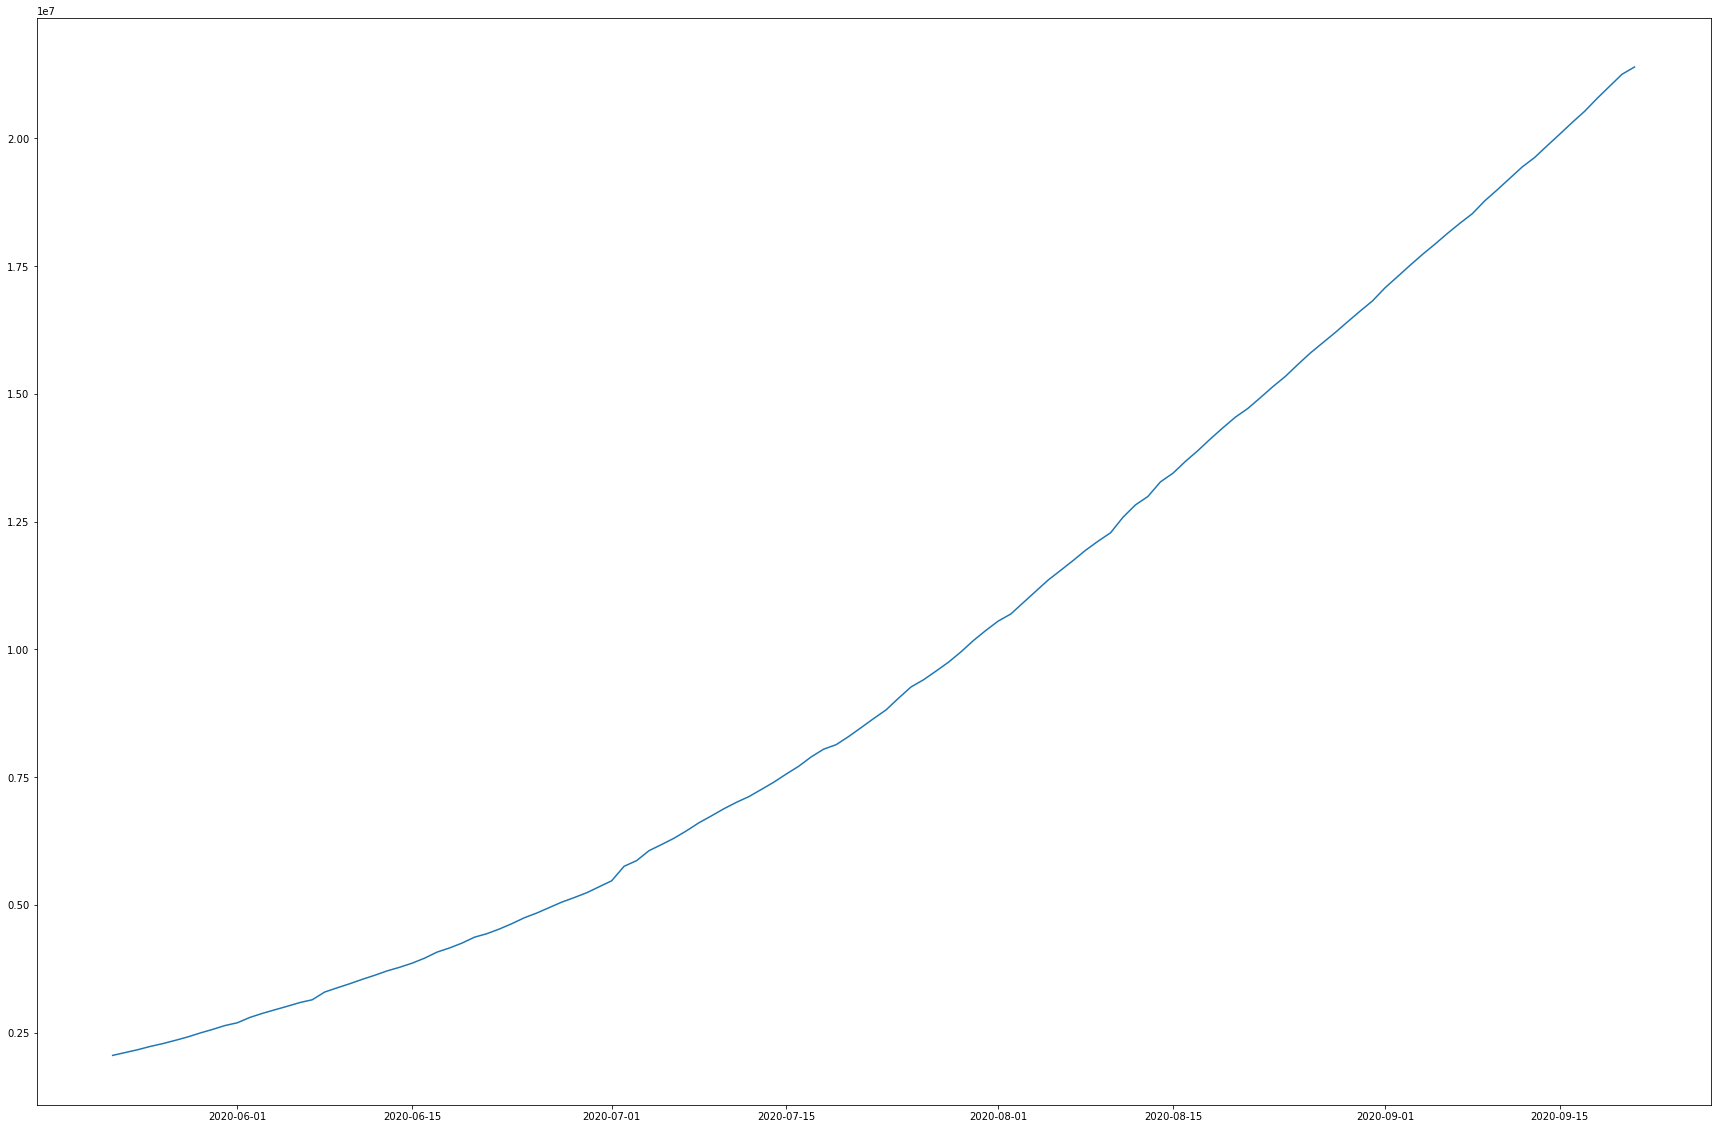

In [86]:
## plotting the test data
plt.plot(test)

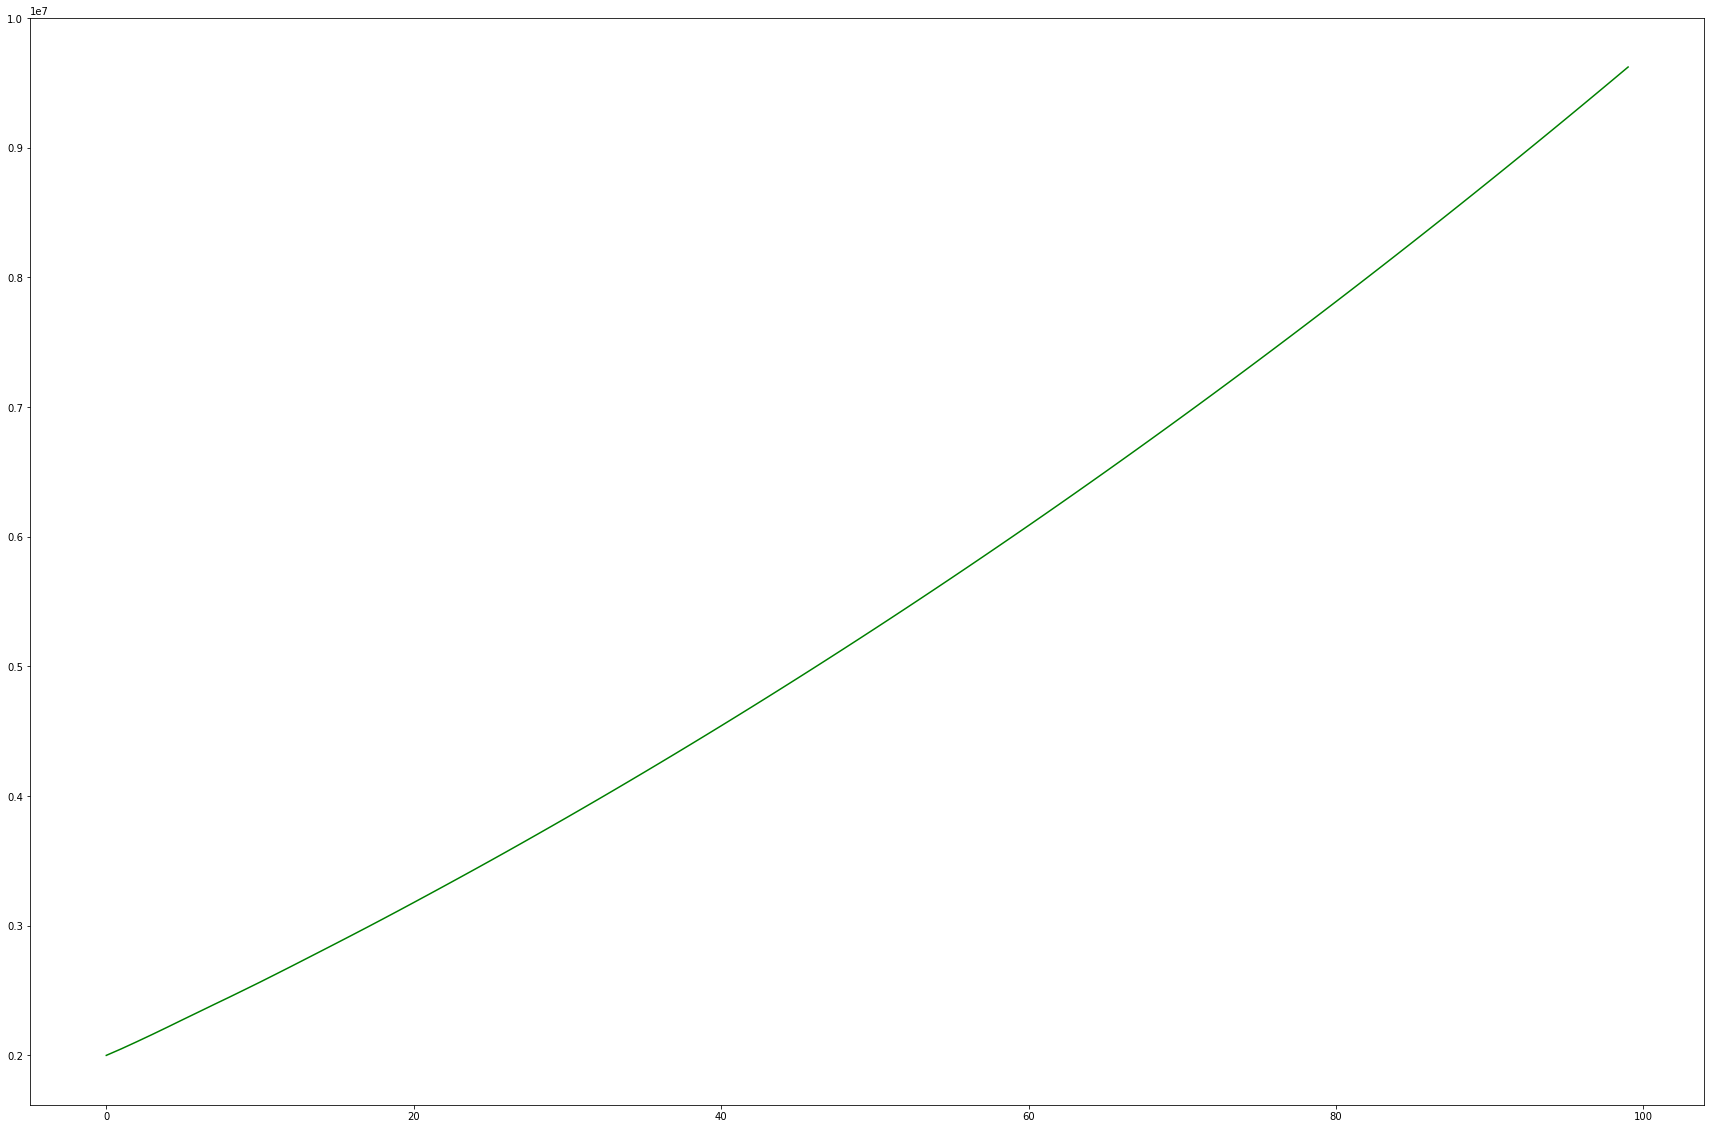

In [87]:
plt.plot(predictions,color='green')

# Death cases daywise

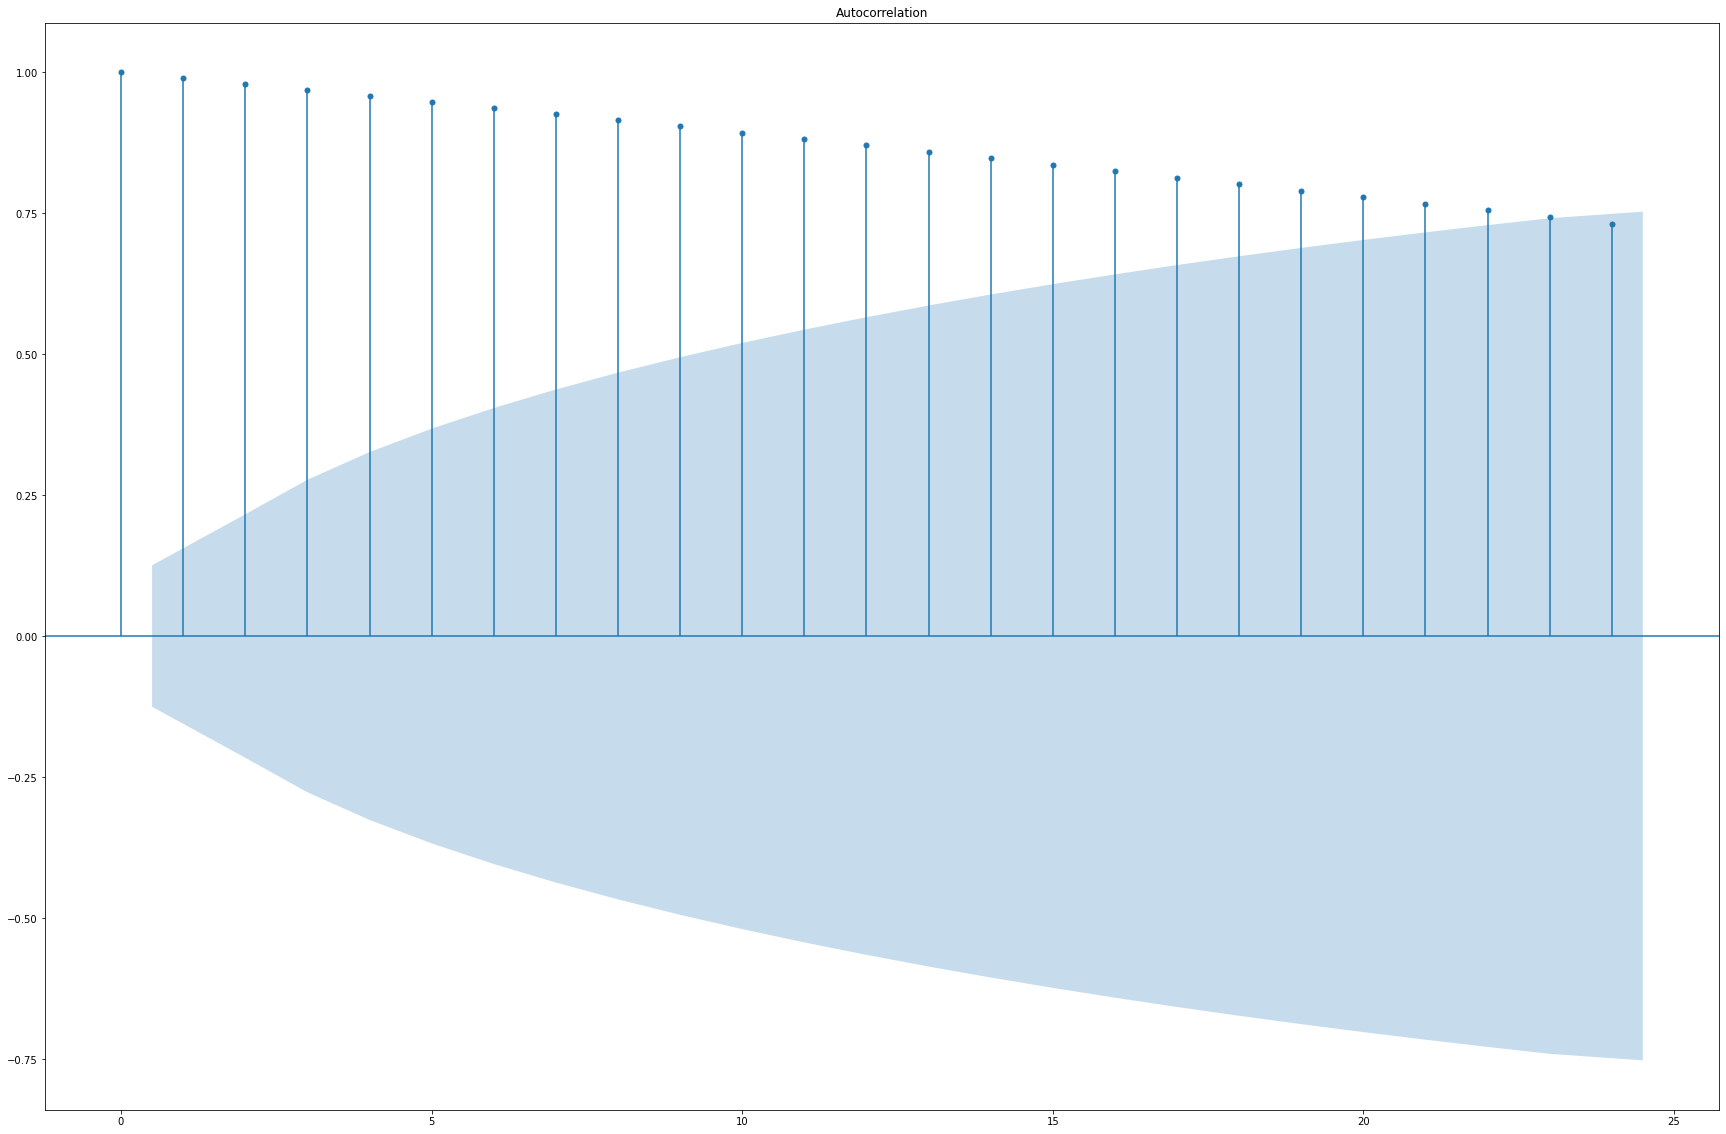

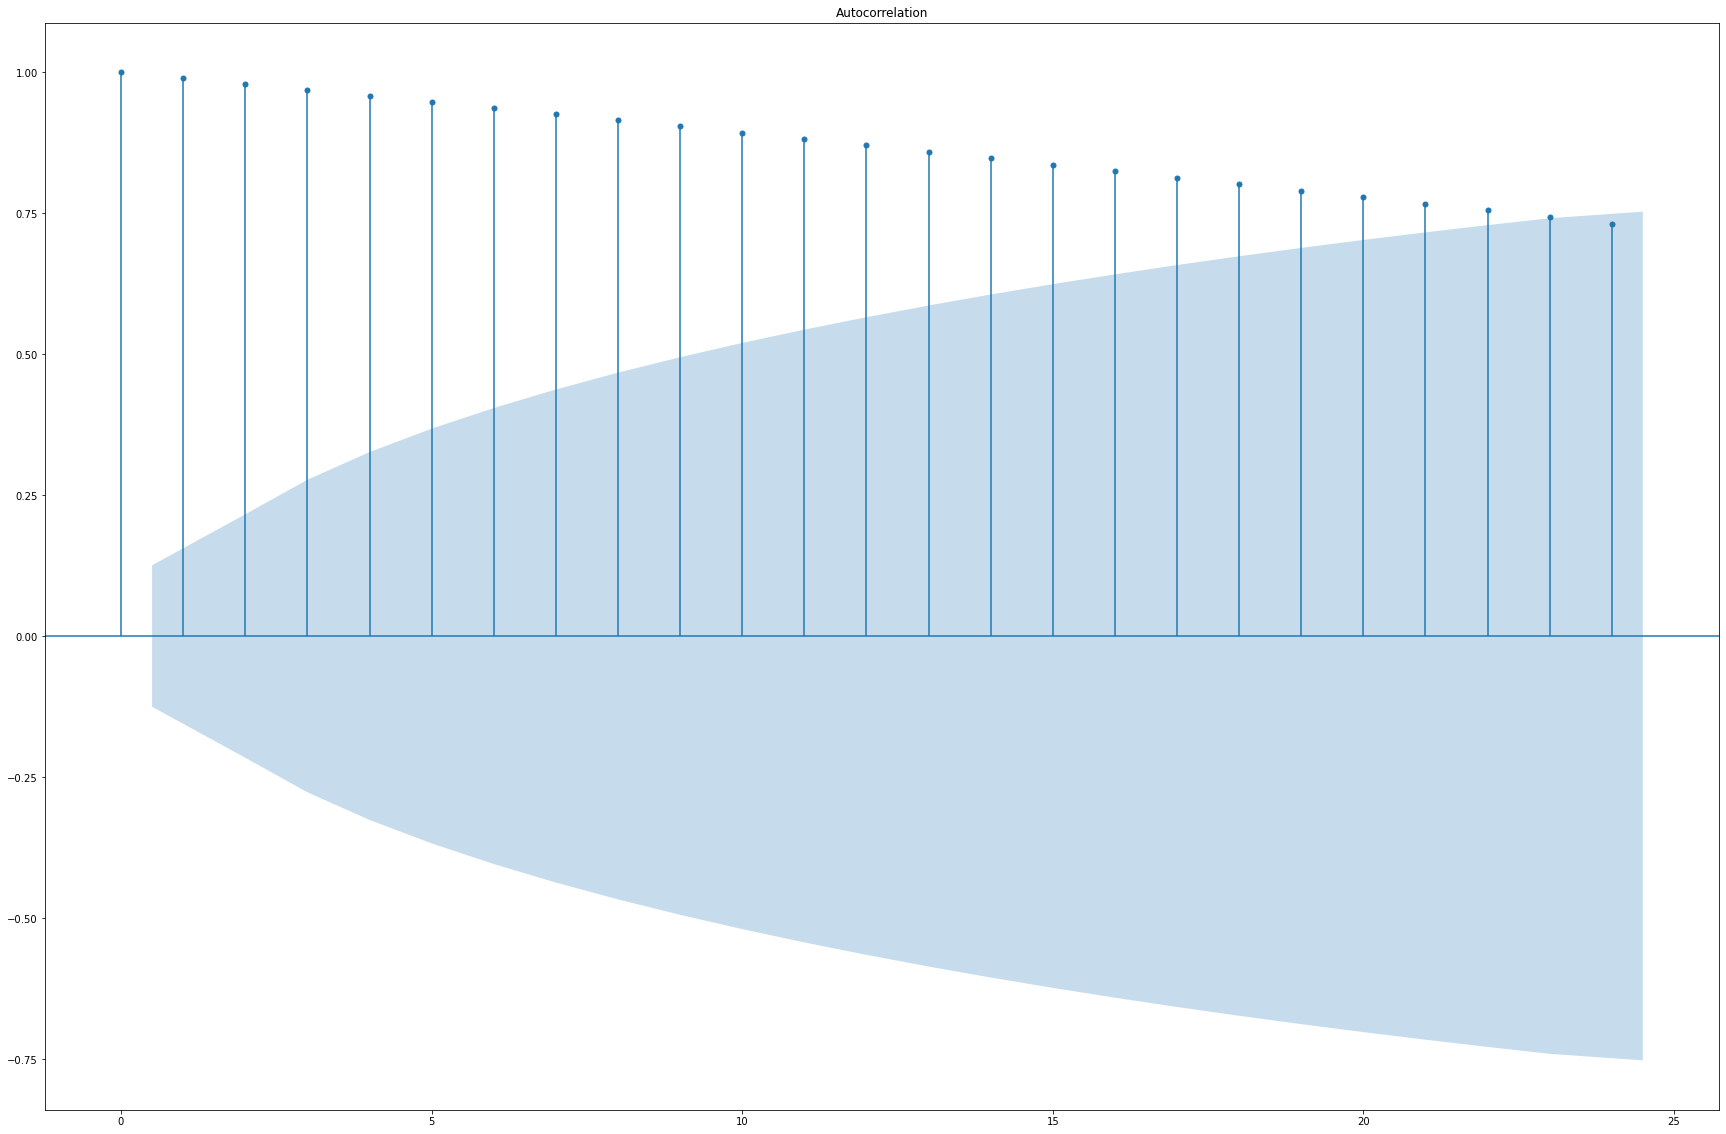

In [88]:
plot_acf(death_daywise)

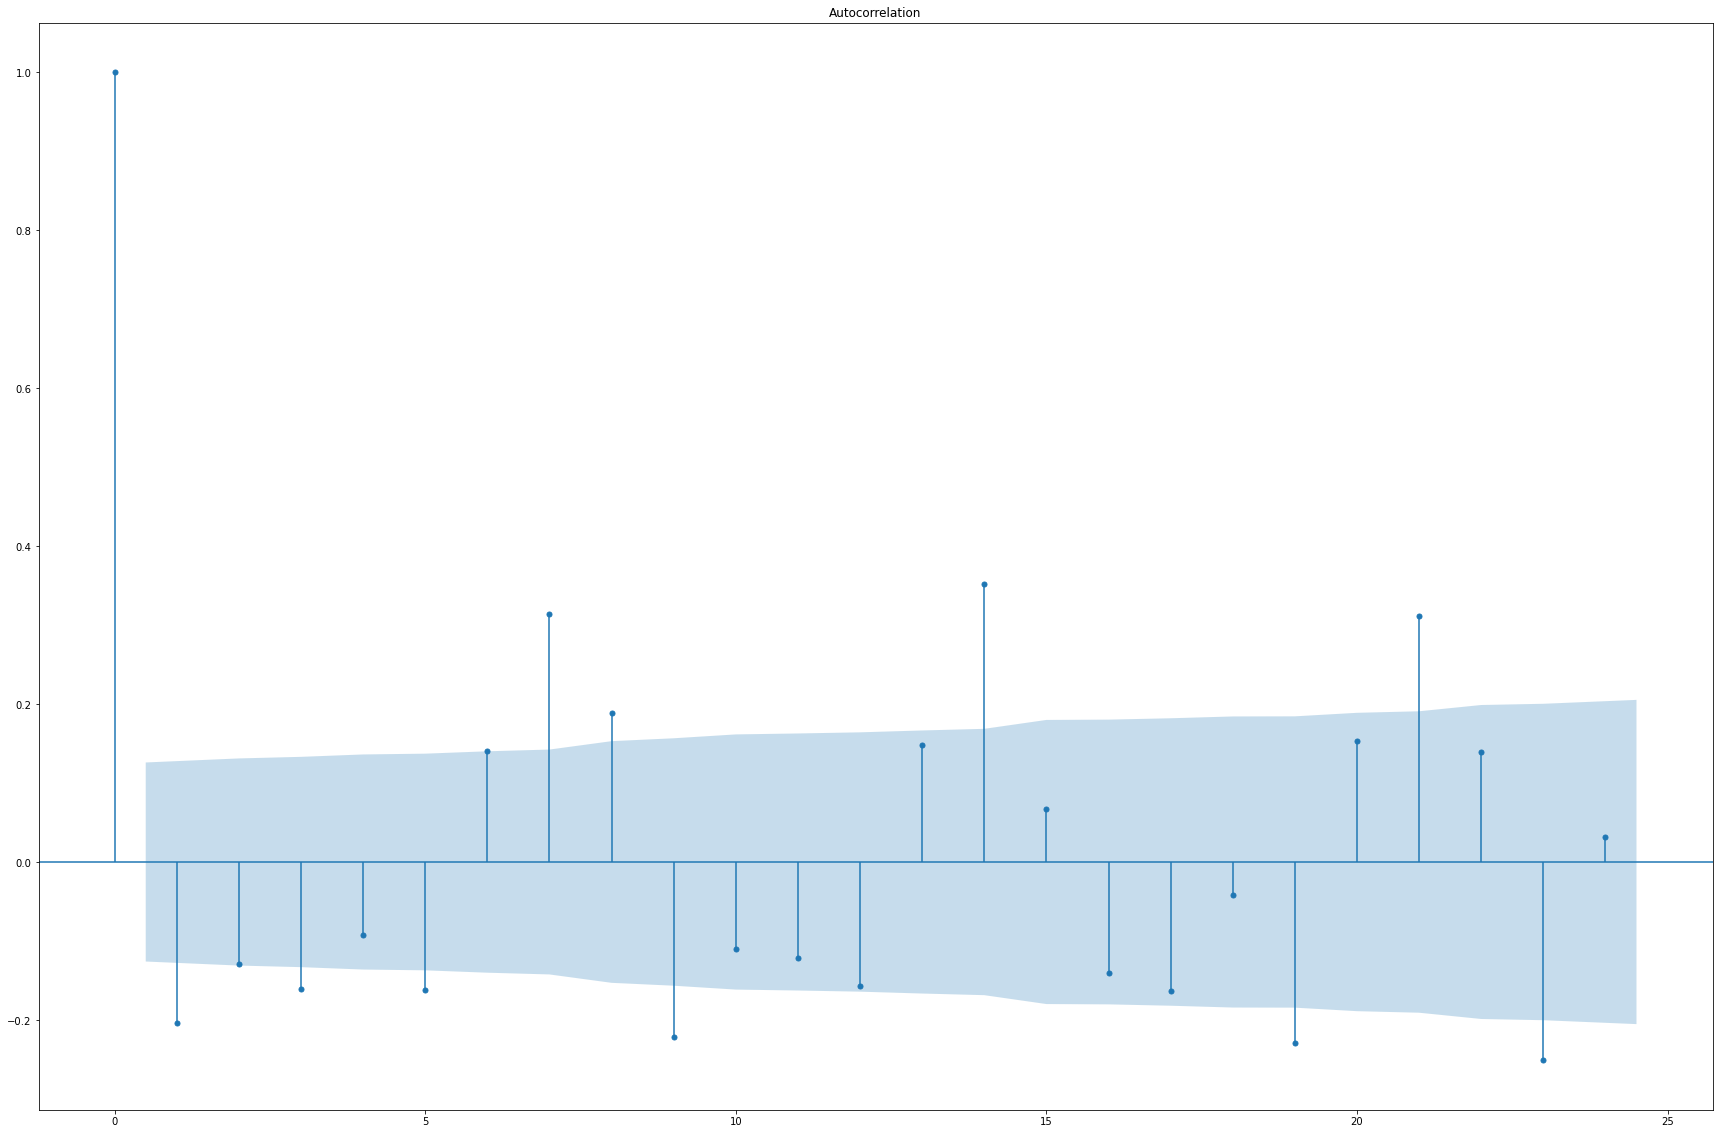

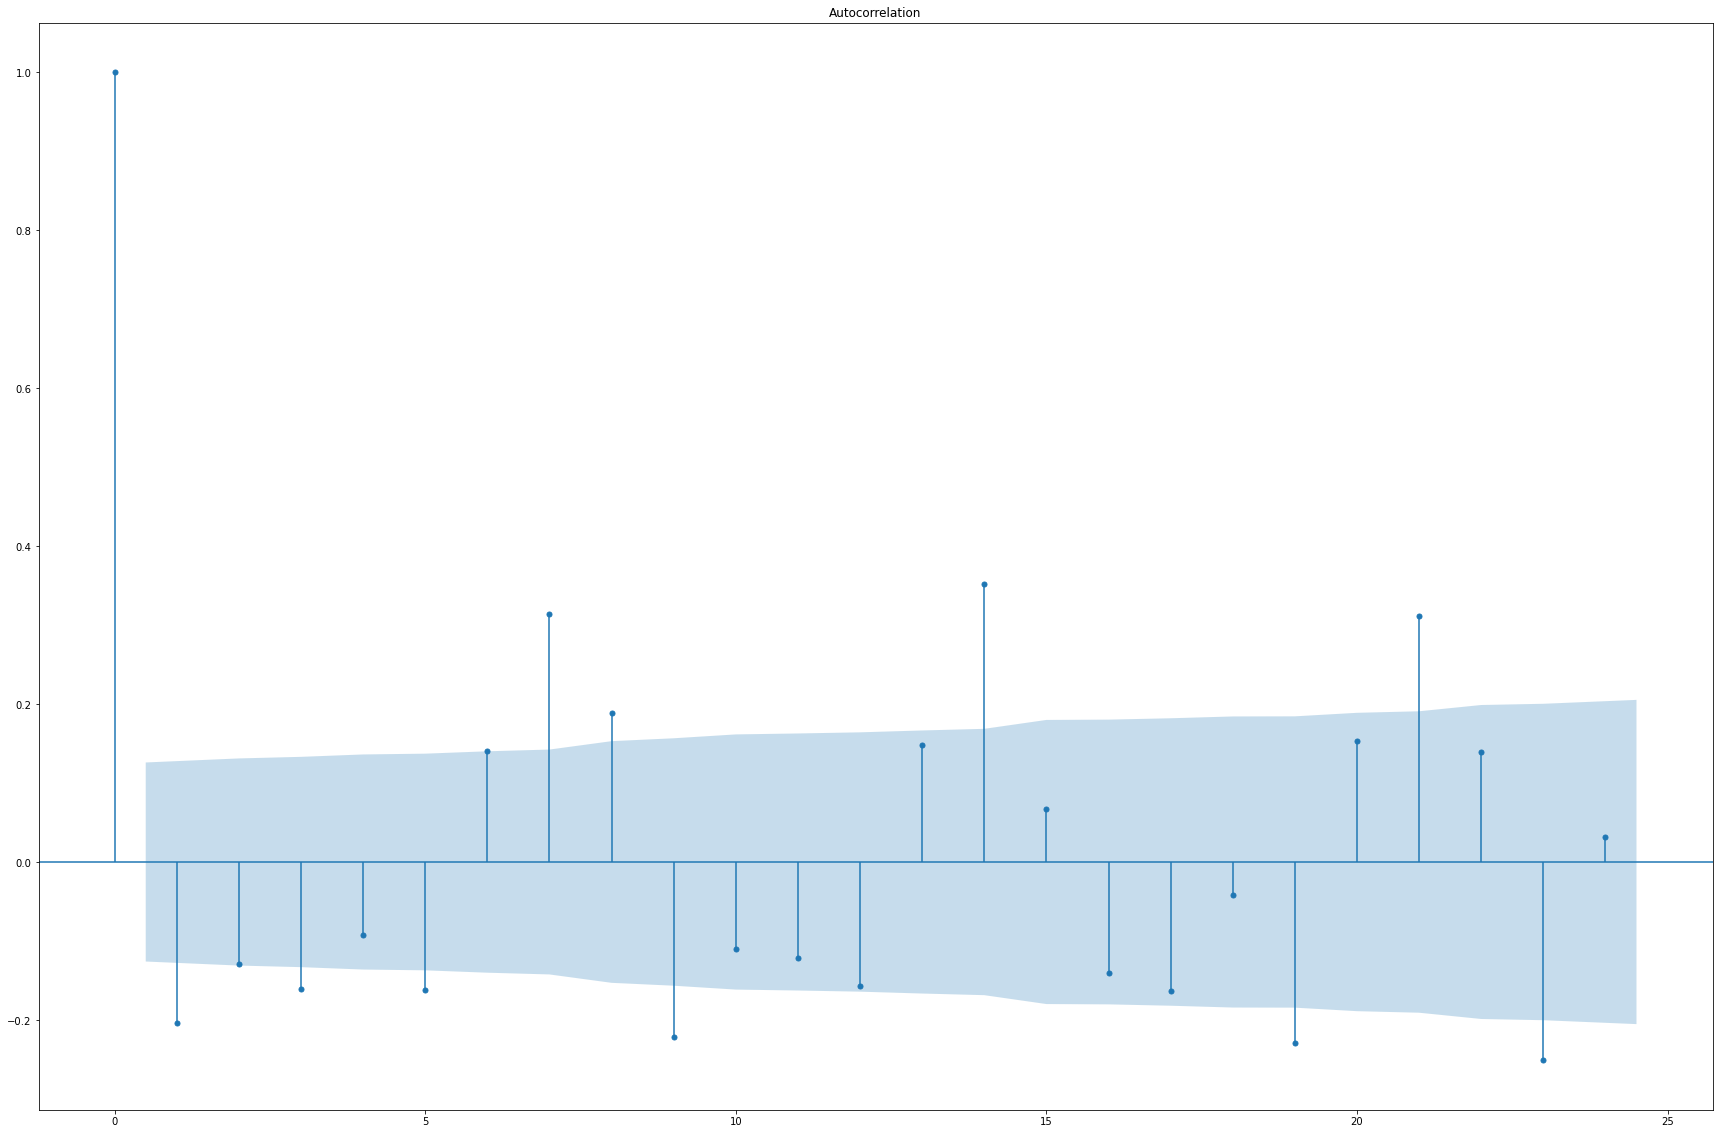

In [89]:
## making it stationary by taking difference of 1
data3=death_daywise.diff(periods=1)
data3=data3.diff(periods=1)
data3.dropna(inplace=True)
plot_acf(data3)

In [90]:
data3

,No_of_death_cases_in_a_day
Date,
2020-01-24,7.0
2020-01-25,8.0
2020-01-26,-2.0
2020-01-27,12.0
2020-01-28,23.0
...,...
2020-09-17,-297.0
2020-09-18,250.0
2020-09-19,-474.0


In [91]:
## Creating training and test sets
train=death_daywise[:121]
test=death_daywise[121:]

In [116]:
test

,No_of_death_cases_in_a_day
Date,
2020-05-22,340851
2020-05-23,344742
2020-05-24,347870
2020-05-25,349062
2020-05-26,353180
...,...
2020-09-17,946061
2020-09-18,951767
2020-09-19,956999


In [92]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(3,1,0))

model_arima_fit=model_arima.fit()

In [93]:
## evaluate the model
print(model_arima_fit.aic)

1917.451144946424


In [111]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=120)[0]
predictions

array([ 340092.12248051,  343746.16575599,  346917.68166758,
        350355.02784505,  354530.79999326,  359335.26202214,
        364265.88030821,  368797.4350931 ,  372714.58528703,
        376261.52927695,  379981.95349899,  384316.93032895,
        389266.88060145,  394396.91038579,  399174.78683207,
        403367.78914876,  407202.77042501,  411186.66157512,
        415729.56567916,  420846.97385422,  426156.27360128,
        431166.04759185,  435640.26430641,  439766.6515539 ,
        444008.95211527,  448759.40250599,  454052.02065473,
        459545.86647894,  464784.14764059,  469532.56083954,
        473946.53550865,  478448.23926968,  483410.19327888,
        488882.47270061,  494563.14509441,  500028.20543278,
        505046.0714977 ,  509743.50401232,  514504.33056849,
        519681.45979588,  525338.11554657,  531207.87827278,
        536897.98724992,  542180.95386314,  547158.09357283,
        552177.62818006,  557573.10216154,  563418.48455736,
        569479.634208  ,

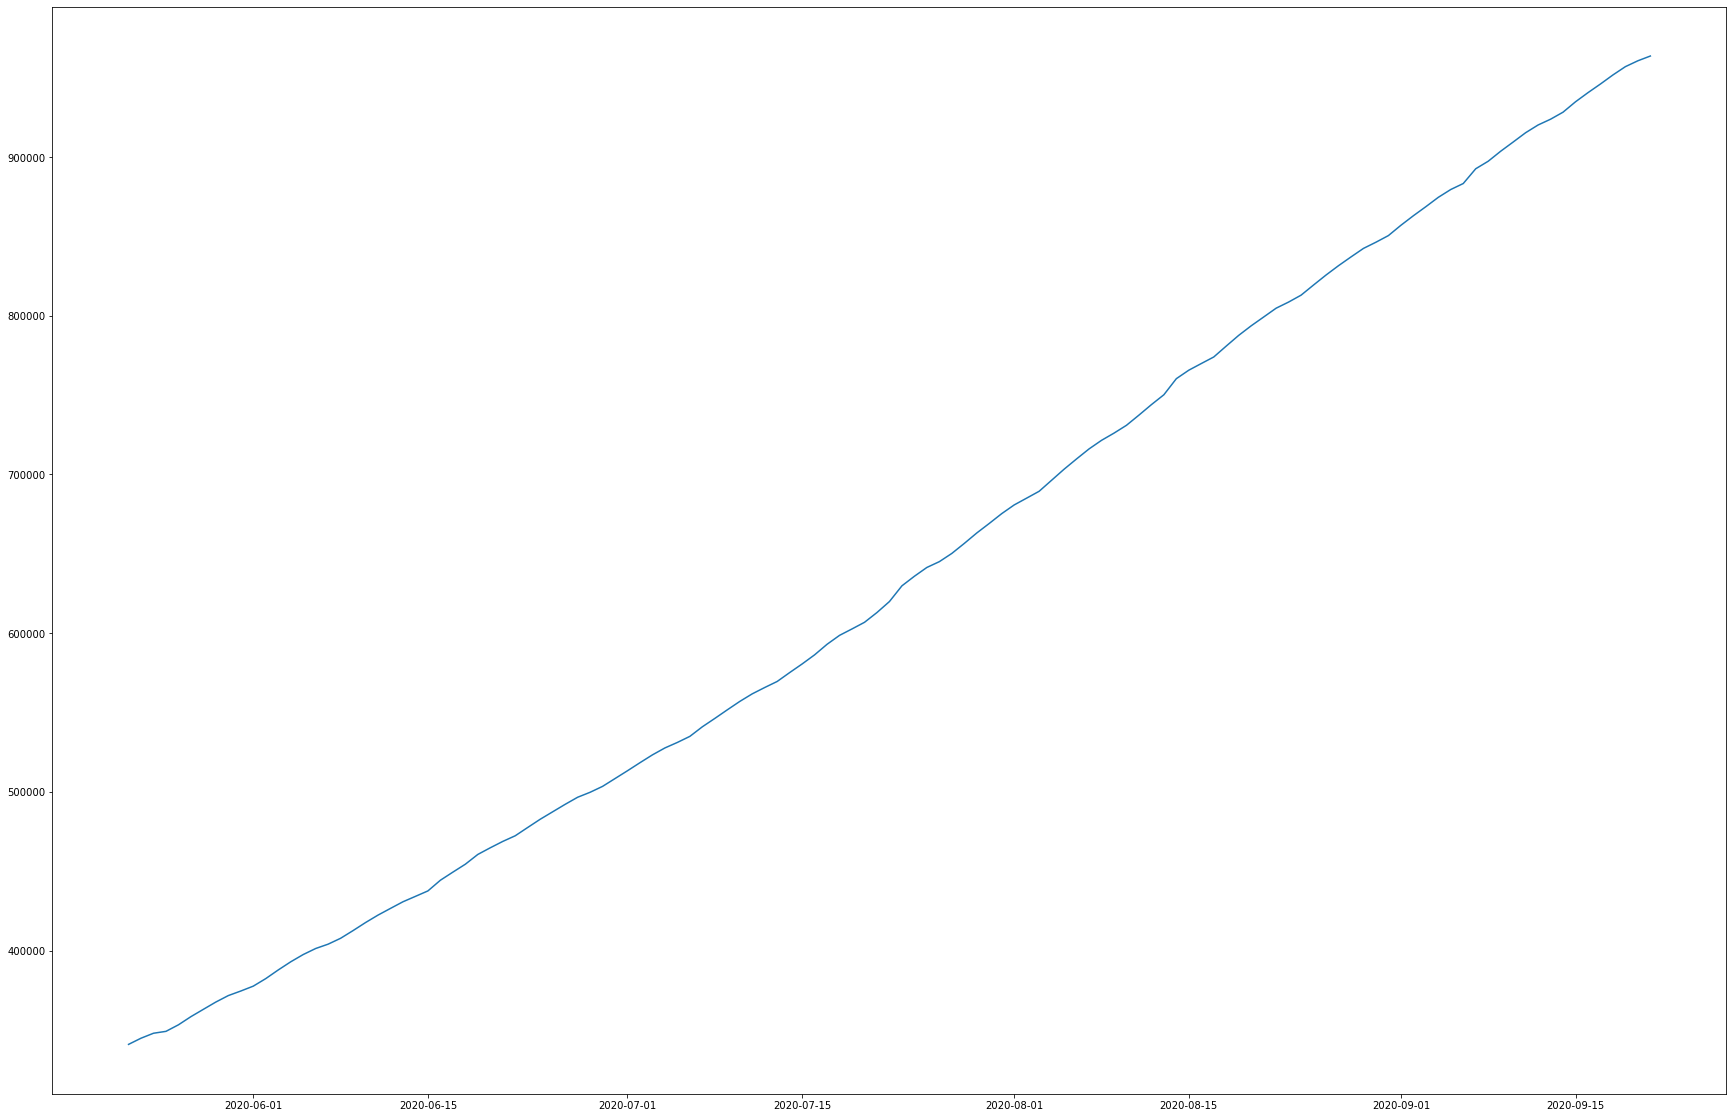

In [95]:
## plotting the test data
plt.plot(test)

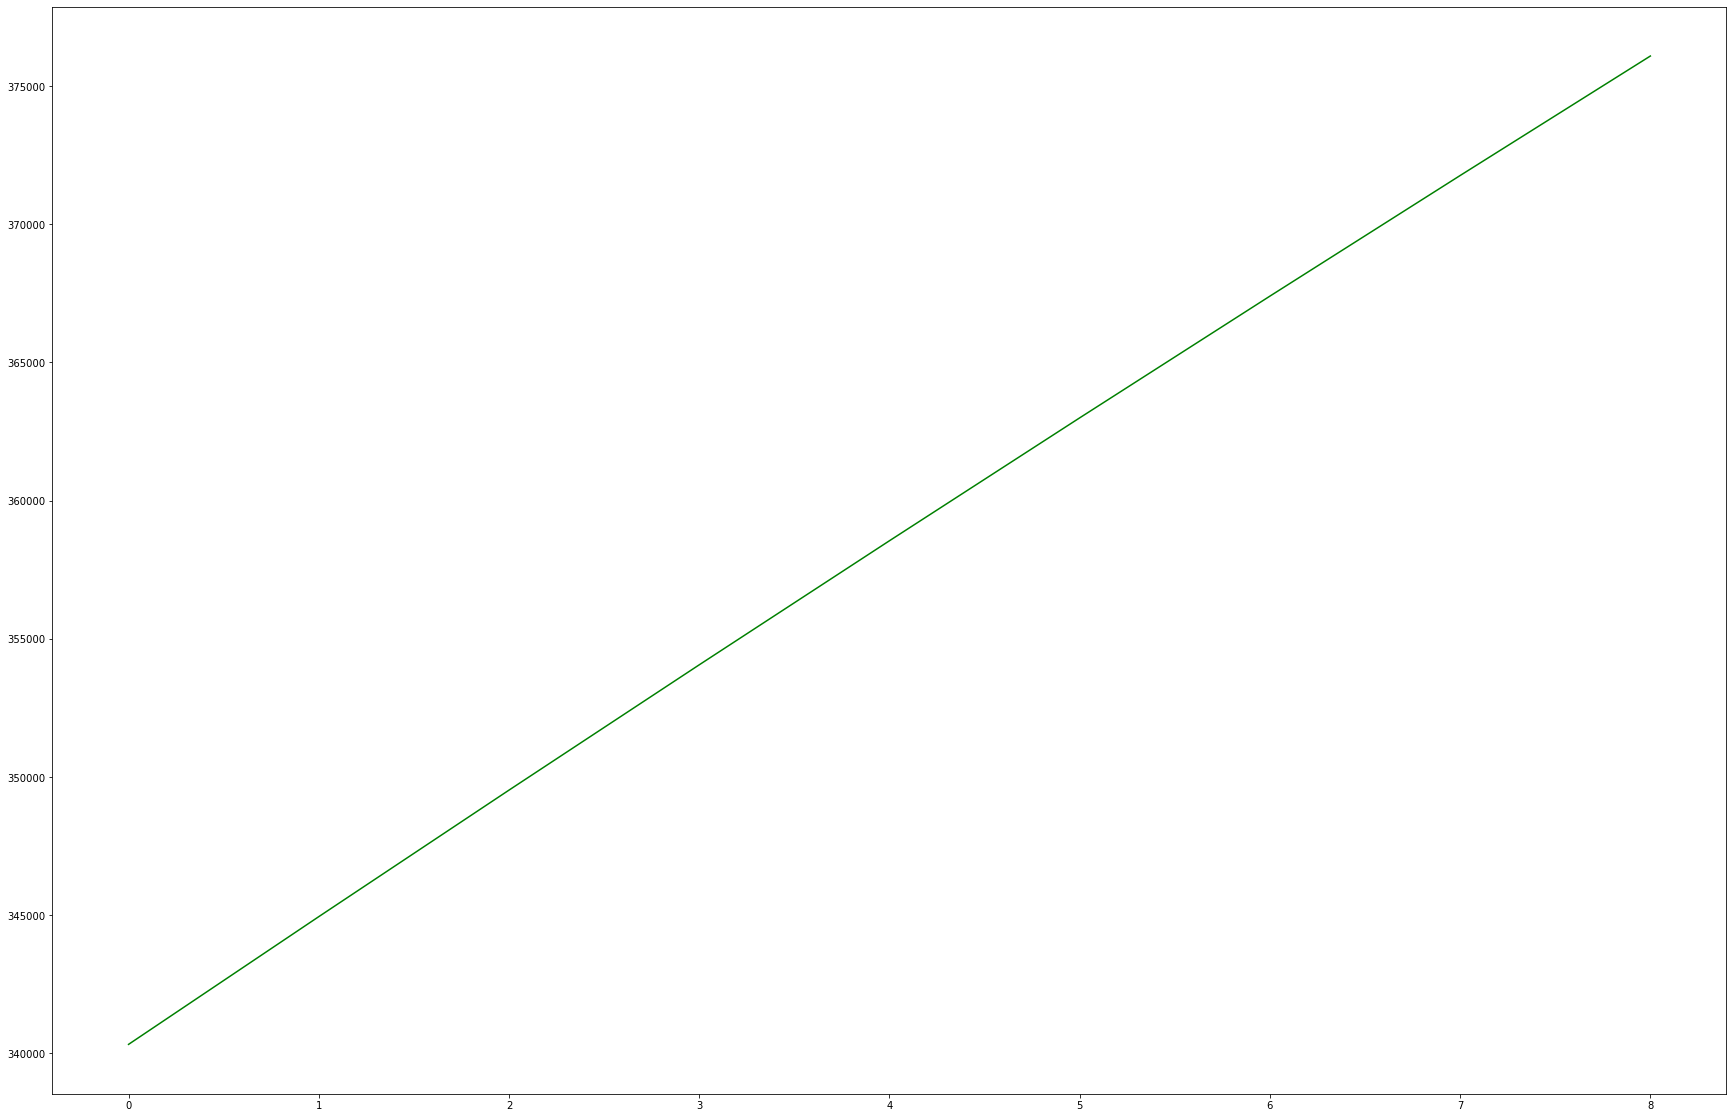

In [96]:
plt.plot(predictions,color='green')

In [97]:


for params in pdq:
    try:
        model_arima = ARIMA(train, order=params)
        model_arima_fit = model_arima.fit()
        print(params, model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 3162.6847229083996
(0, 0, 1) 3004.5020675987766
(0, 1, 0) 2247.226018184082
(0, 1, 1) 2125.621920745394
(0, 1, 2) 2051.1362931035997
(0, 1, 3) 2029.5235862057546
(0, 1, 4) 1964.3727653505323
(0, 2, 0) 1898.0892958062093
(0, 2, 1) 1899.9592305286592
(0, 2, 2) 1893.2021764731444
(0, 2, 3) 1892.6036149368156
(0, 2, 4) 1893.9589075450644
(1, 0, 0) 2360.4959244475845
(1, 1, 0) 1917.0436015504968
(1, 1, 1) 1919.0347671477807
(1, 1, 2) 1914.1595873939202
(1, 1, 3) 1913.6686043398595
(1, 1, 4) 1908.1555649881327
(1, 2, 0) 1900.0103100529418
(1, 2, 1) 1895.6331627604468
(1, 2, 2) 1893.5990854330757
(1, 2, 3) 1891.7727806269695
(1, 2, 4) 1872.48846359041
(2, 0, 0) 1948.6305091538327
(2, 1, 0) 1919.037952348283
(2, 1, 1) 1916.473623104764
(2, 1, 2) 1914.623058507151
(2, 1, 3) 1912.9070244298039
(2, 2, 0) 1897.6846529513164
(2, 2, 1) 1891.2395768570632
(2, 2, 2) 1856.0320171763233
(2, 2, 3) 1851.11868907285
(2, 2, 4) 1845.3134234583358
(3, 0, 0) 1950.6286855601554
(3, 0, 2) 2071.38092013

In [98]:
## create the final model with lowest aic score parameter

In [99]:
##Model object creation and fitting the model
model_arima = ARIMA(train, order=(4,2,4))

model_arima_fit=model_arima.fit()

In [100]:
## evaluate the model
print(model_arima_fit.aic)

1826.7996968015163


In [101]:
## predicting the out of sample points
predictions = model_arima_fit.forecast(steps=101)[0]
predictions

array([340092.12248051, 343746.16575599, 346917.68166758, 350355.02784505,
       354530.79999326, 359335.26202214, 364265.88030821, 368797.4350931 ,
       372714.58528703, 376261.52927695, 379981.95349899, 384316.93032895,
       389266.88060145, 394396.91038579, 399174.78683207, 403367.78914876,
       407202.77042501, 411186.66157512, 415729.56567916, 420846.97385422,
       426156.27360128, 431166.04759185, 435640.26430641, 439766.6515539 ,
       444008.95211527, 448759.40250599, 454052.02065473, 459545.86647894,
       464784.14764059, 469532.56083954, 473946.53550865, 478448.23926968,
       483410.19327888, 488882.47270061, 494563.14509441, 500028.20543278,
       505046.0714977 , 509743.50401232, 514504.33056849, 519681.45979588,
       525338.11554657, 531207.87827278, 536897.98724992, 542180.95386314,
       547158.09357283, 552177.62818006, 557573.10216154, 563418.48455736,
       569479.634208  , 575393.3871696 , 580937.4691936 , 586190.74204726,
       591468.43802037, 5

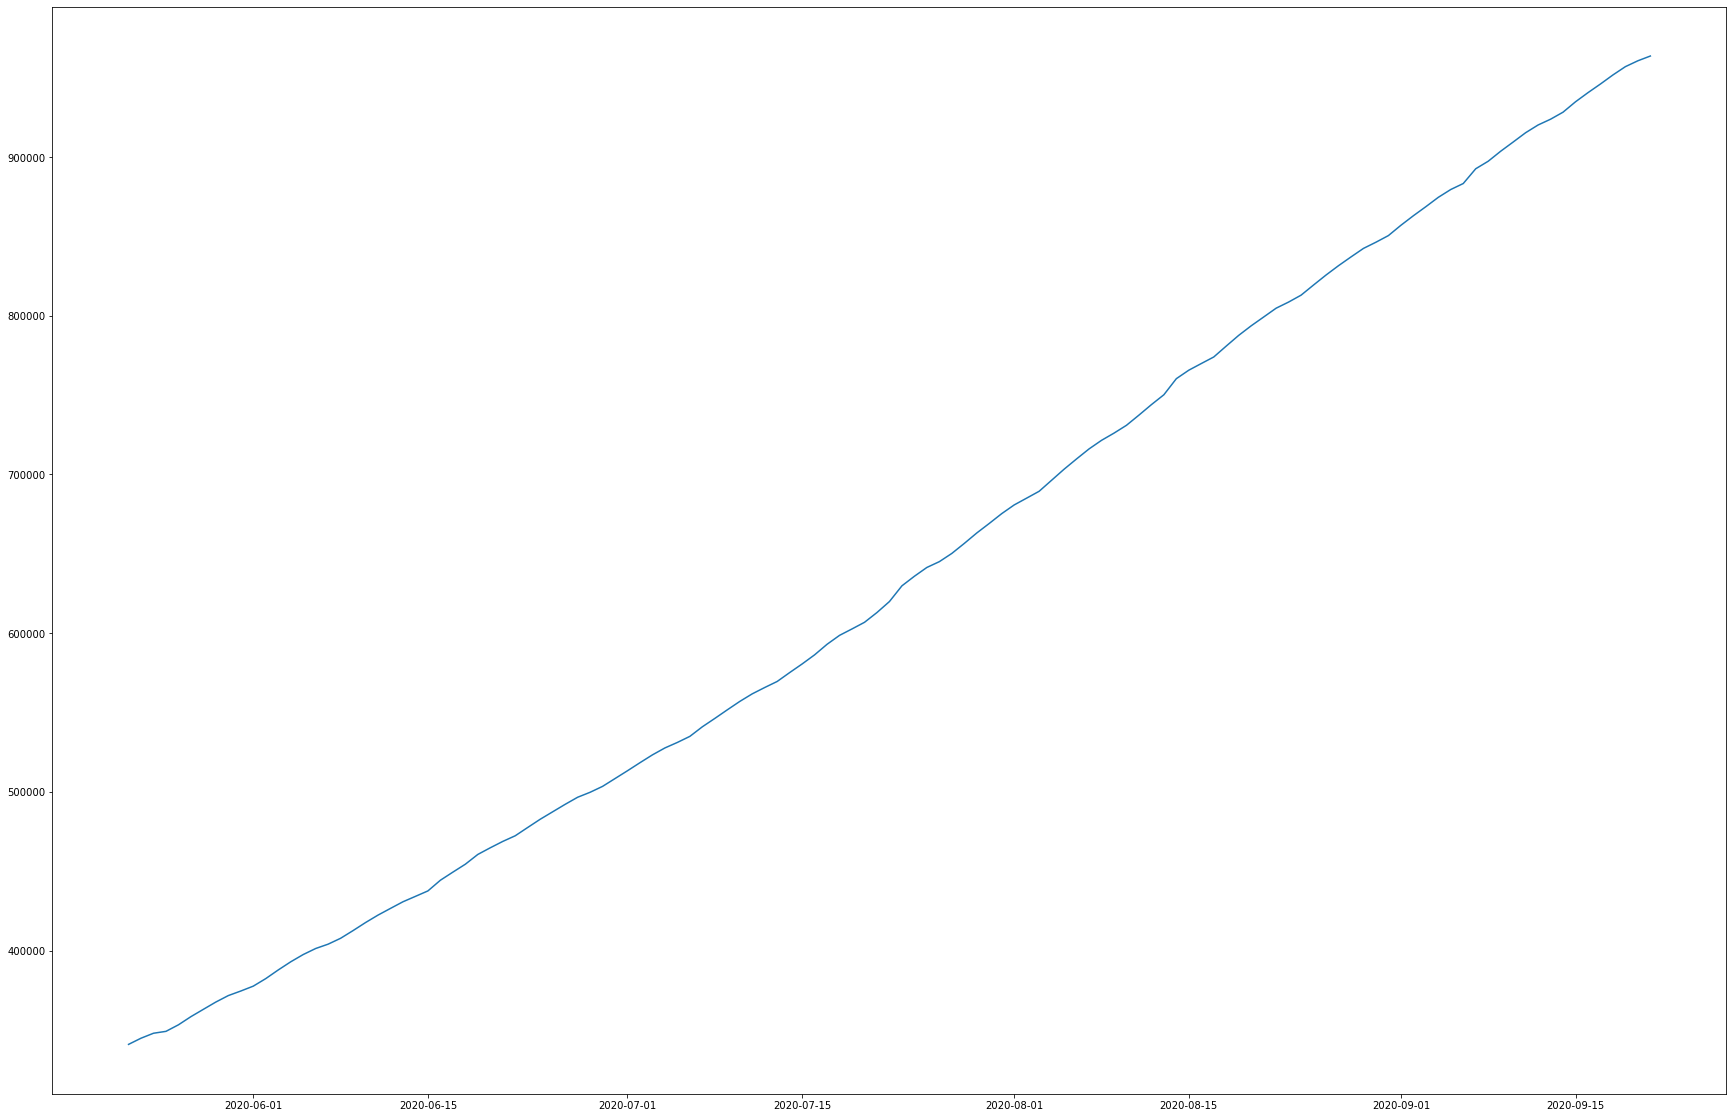

In [102]:
## plotting the test data
plt.plot(test)

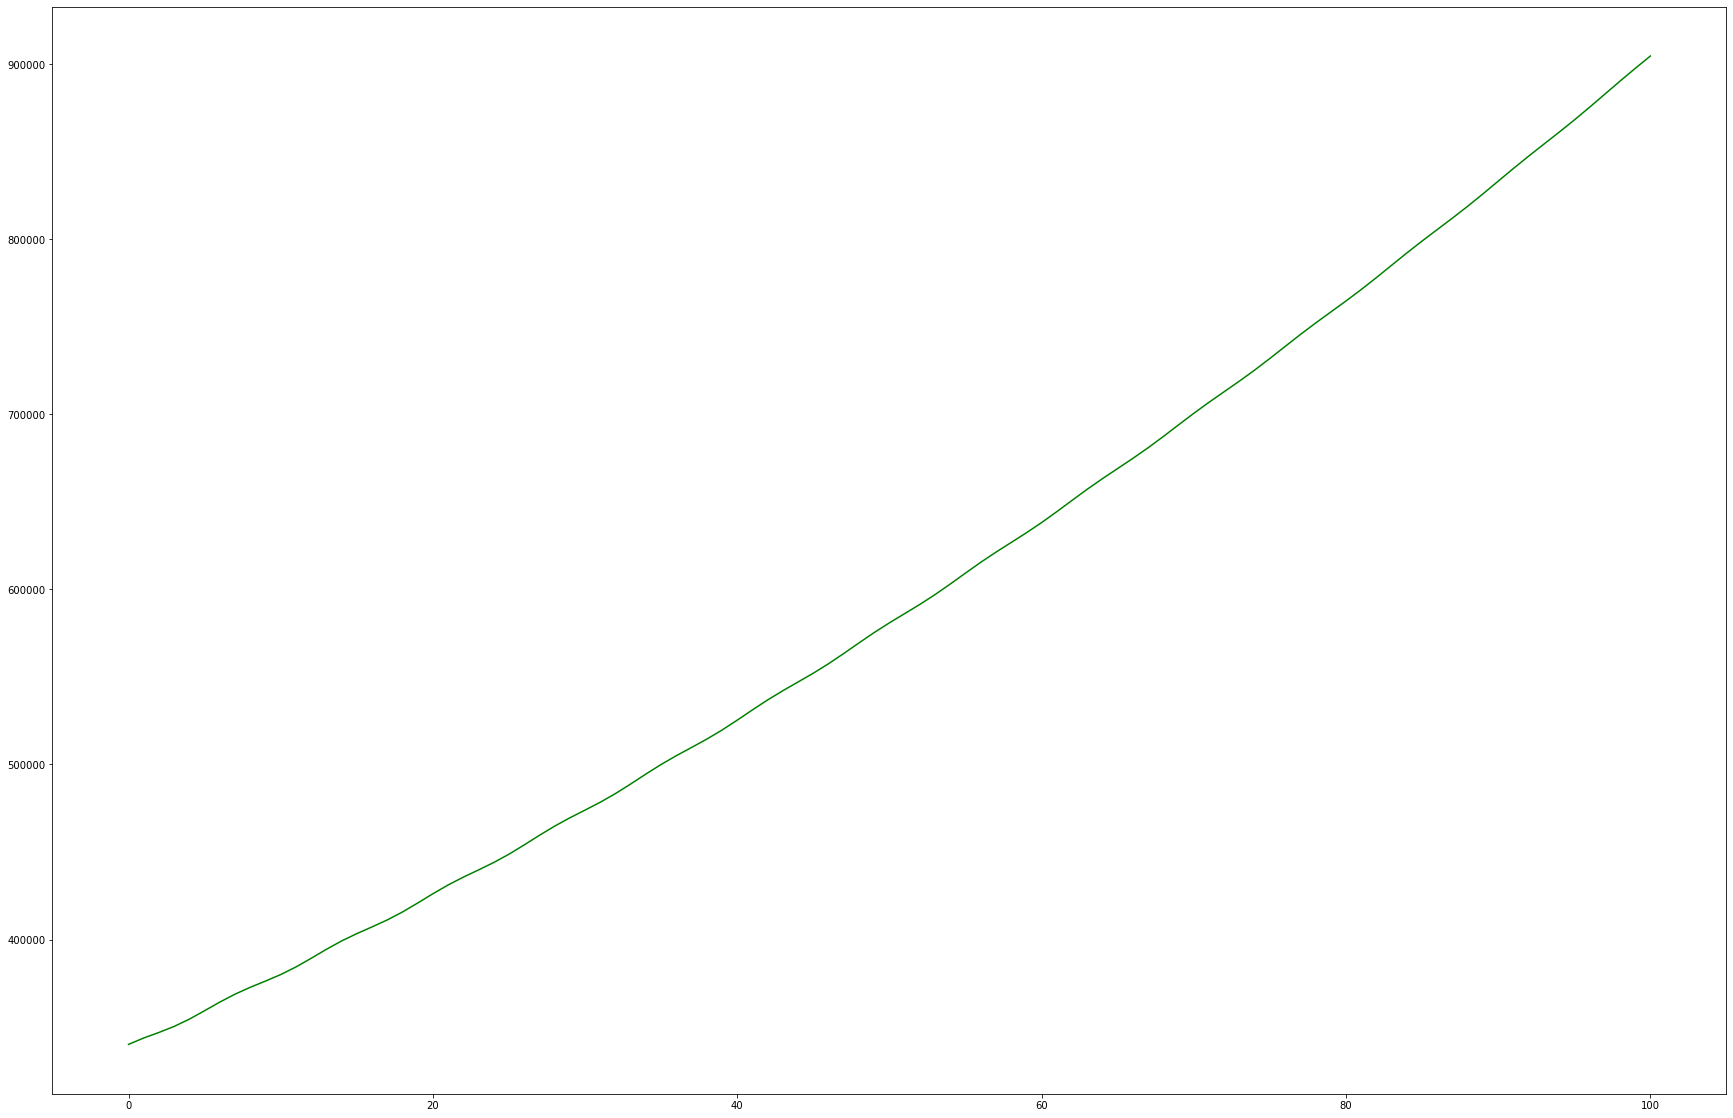

In [103]:
plt.plot(predictions,color='green')

In [124]:
test
predictions
forecast_errors = [test[i]-predictions[i] for i in range(len(test))]
print('Forecast Errors: %s' % forecast_errors)

Forecast Errors: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]
